In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.max_open_warning':0}) # prevents warning message for more than 20 image generation
import warnings
warnings.filterwarnings('ignore')

###### Data Preprocessing

In [22]:
# the cleveland is chosen since it has been the one majorly used for machine learning training..
df = pd.read_csv('processed.cleveland.data', delimiter=',', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 
                                   'oldpeak', 'slope', 'ca', 'thal', 'num']

display(df.columns) # names of variables or features
display(df.dtypes) # these are the different types of data types. There are float, object and int data types

df['num'] = np.where(df['num']>0, 1, 0) # replacing those values greater than 0 with 1. 0 signifies absence of heart disease
# while 1 signifies presence of heart disease

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [23]:
# The 'ca' and 'thal' features are of object data type which should not be since 'ca' represents major number of vessels 
# which is a float data type while 'thal' represents thalassemia which also have all values to be of type float
# This means that this two features have varying data type

df_dtype = []
for val in df.columns: #creating a function to show the type consistency in the dataframe
    df_dtype.append((val, set([type(get_val) for get_val in df[val]])))
display(df_dtype)
# From the data display it shows that the features 'ca' and 'thal' are inconsistent with the rest since they are string

display(df.isna().sum()) # no value represented with nan...

[('age', {float}),
 ('sex', {float}),
 ('cp', {float}),
 ('trestbps', {float}),
 ('chol', {float}),
 ('fbs', {float}),
 ('restecg', {float}),
 ('thalach', {float}),
 ('exang', {float}),
 ('oldpeak', {float}),
 ('slope', {float}),
 ('ca', {str}),
 ('thal', {str}),
 ('num', {int})]

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [4]:
for col in df.columns:
    for row in range(len(df)):
        try:
            df.loc[row, col] = float(df.loc[row, col])
        except ValueError:
            df.loc[row, col] = np.nan
# Those values that could not be converted to float were outrightly converted to nan
display(df.isna().sum()) # displaying nan values

# filling the missing values with the mean of the distribution
df['ca'] = df['ca'].fillna(df.ca.median()) #filling the missing values with the 'ca' median ensures that the values are discrete
df['thal'] = df['thal'].fillna(df.thal.median()) #filling the missing values with the 'ca' median ensures that the values 
# are discrete

display(df.isna().sum()) # no more nan values present

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

###### Removal of outlier

[('age', 'There is no outlier'),
 ('sex', 'There is no outlier'),
 ('cp', 'There is outlier'),
 ('trestbps', 'There is outlier'),
 ('chol', 'There is outlier'),
 ('fbs', 'There is outlier'),
 ('restecg', 'There is no outlier'),
 ('thalach', 'There is outlier'),
 ('exang', 'There is no outlier'),
 ('oldpeak', 'There is outlier'),
 ('slope', 'There is no outlier'),
 ('ca', 'There is outlier'),
 ('thal', 'There is no outlier'),
 ('num', 'There is no outlier')]

[('age', 'There is no outlier'),
 ('sex', 'There is no outlier'),
 ('cp', 'There is outlier'),
 ('trestbps', 'There is no outlier'),
 ('chol', 'There is no outlier'),
 ('fbs', 'There is outlier'),
 ('restecg', 'There is no outlier'),
 ('thalach', 'There is no outlier'),
 ('exang', 'There is no outlier'),
 ('oldpeak', 'There is no outlier'),
 ('slope', 'There is no outlier'),
 ('ca', 'There is outlier'),
 ('thal', 'There is no outlier'),
 ('num', 'There is no outlier')]

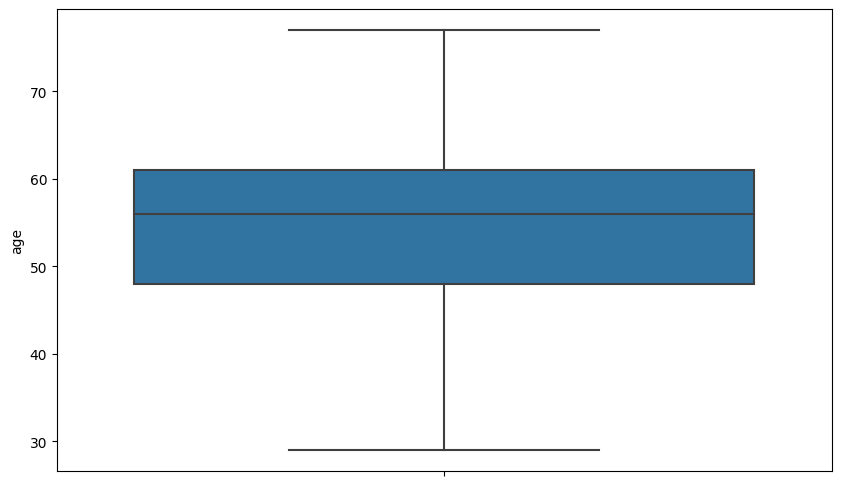

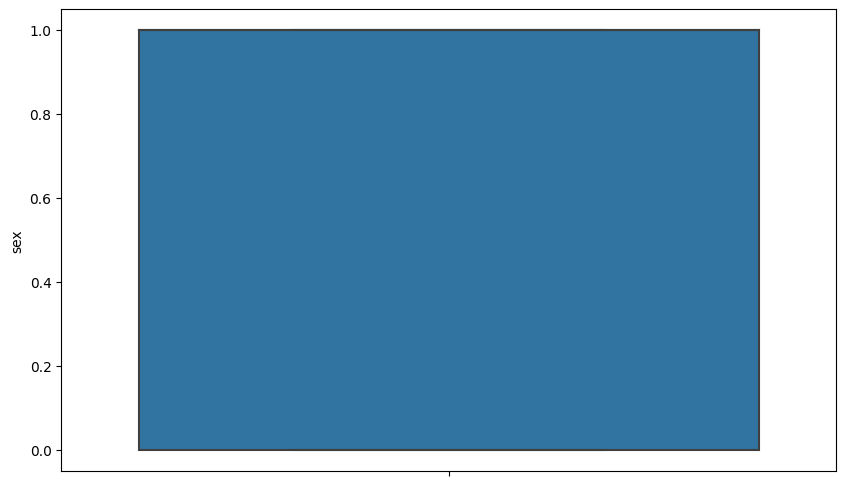

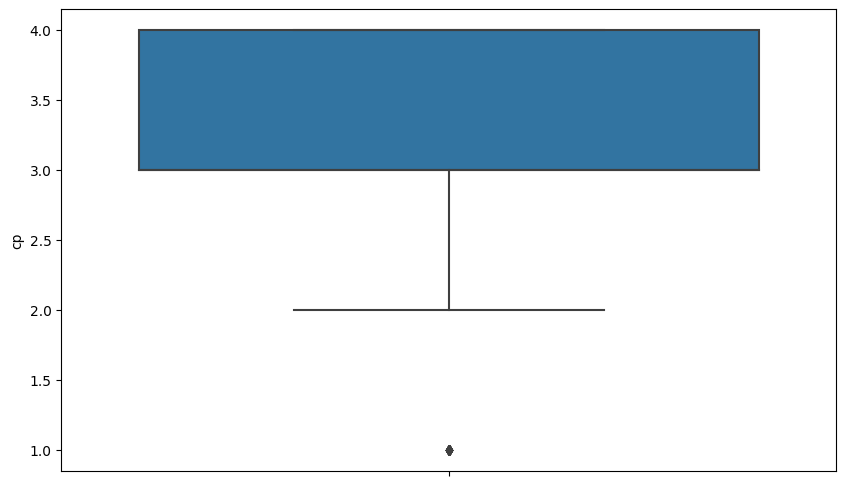

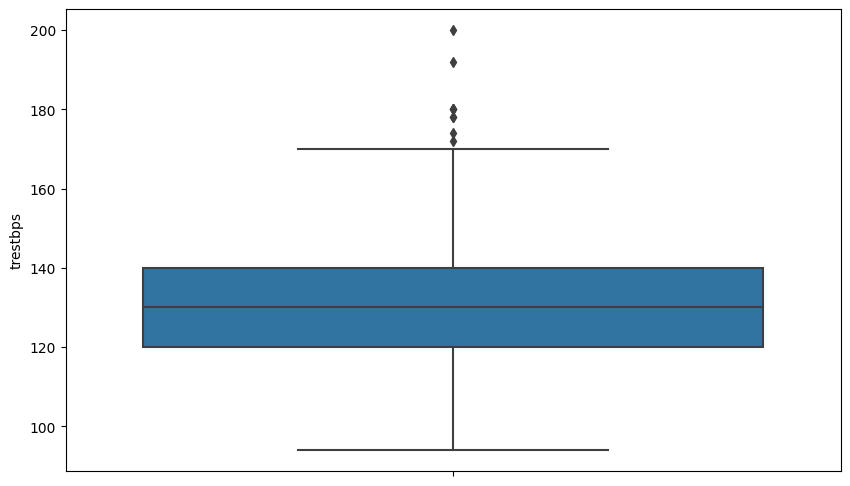

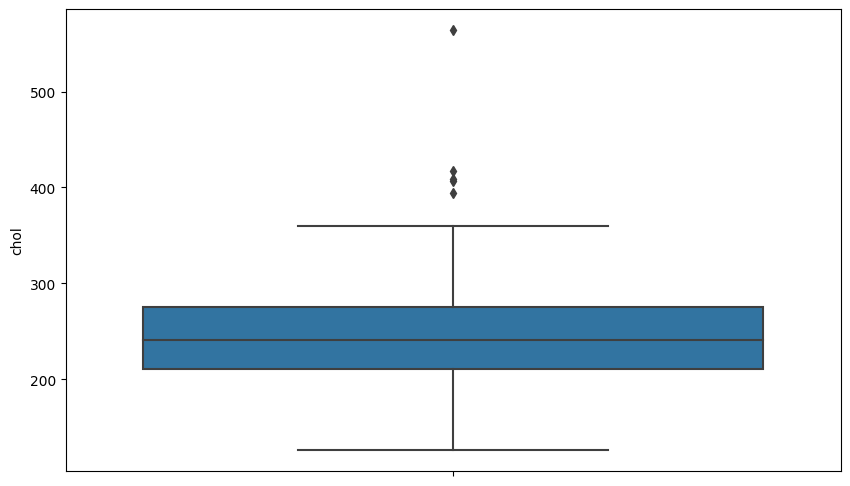

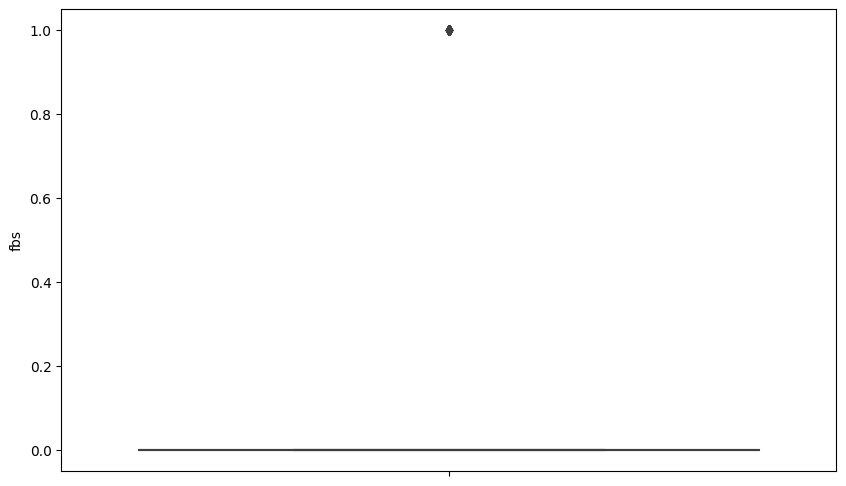

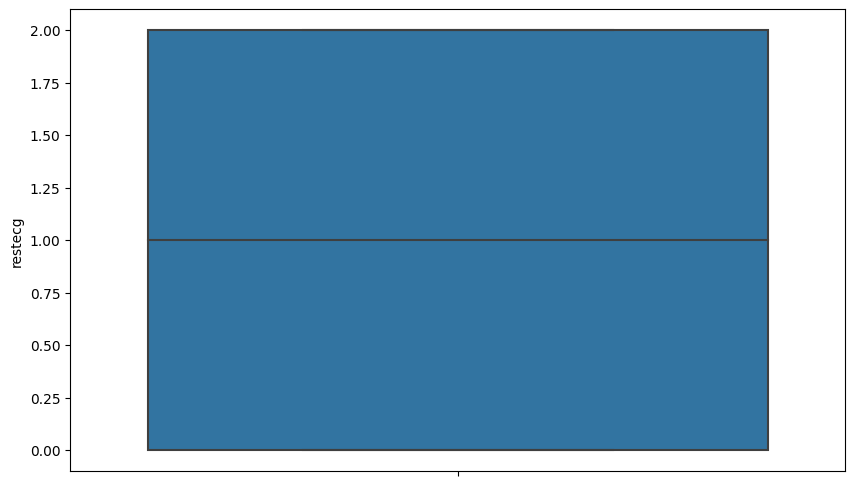

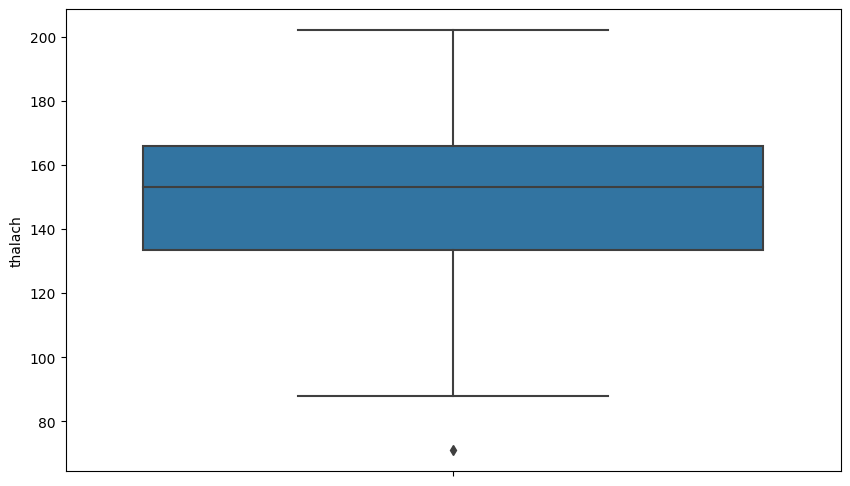

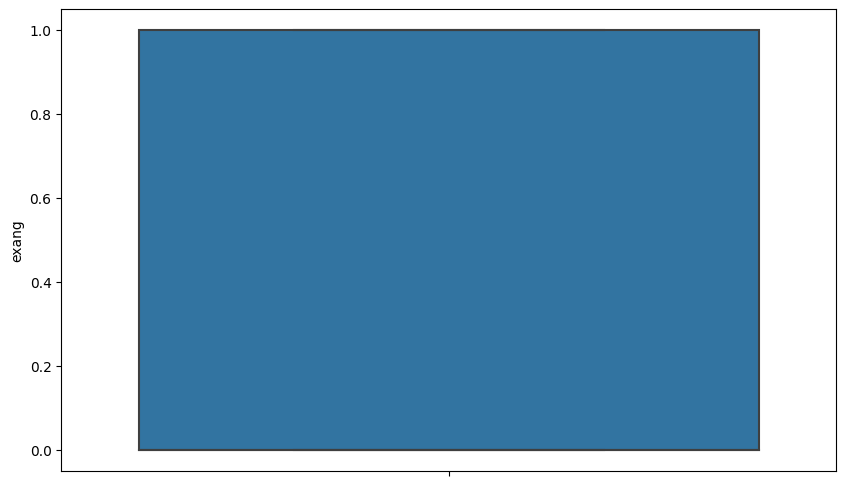

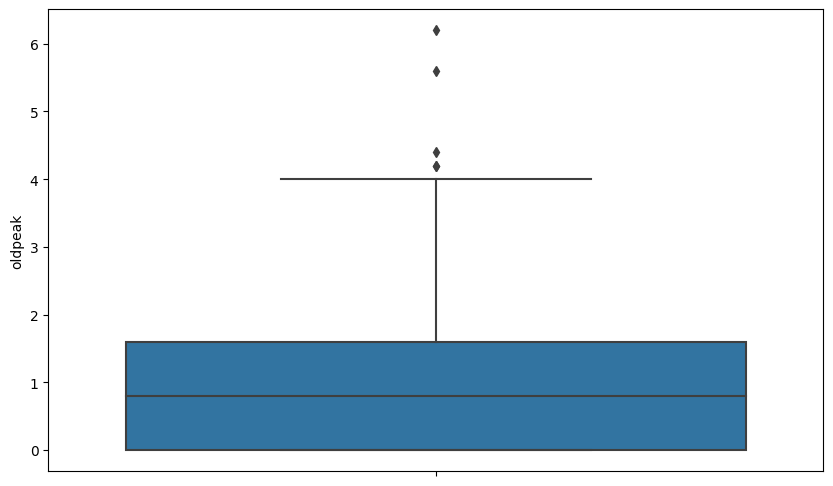

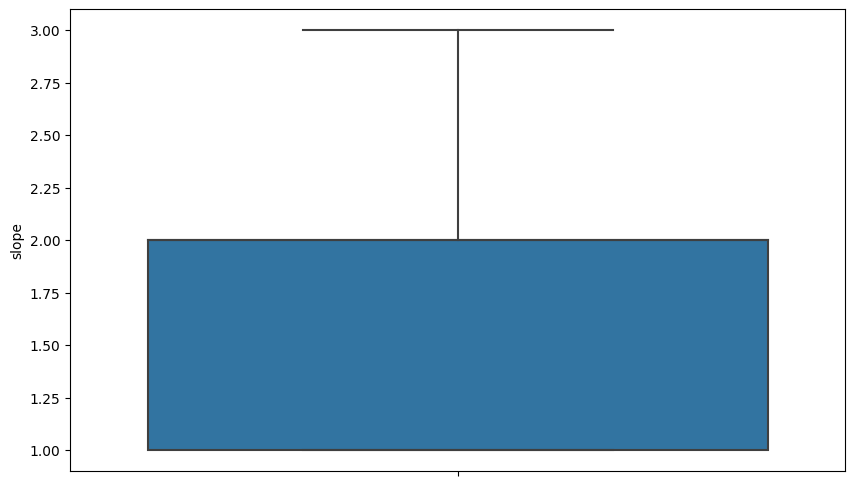

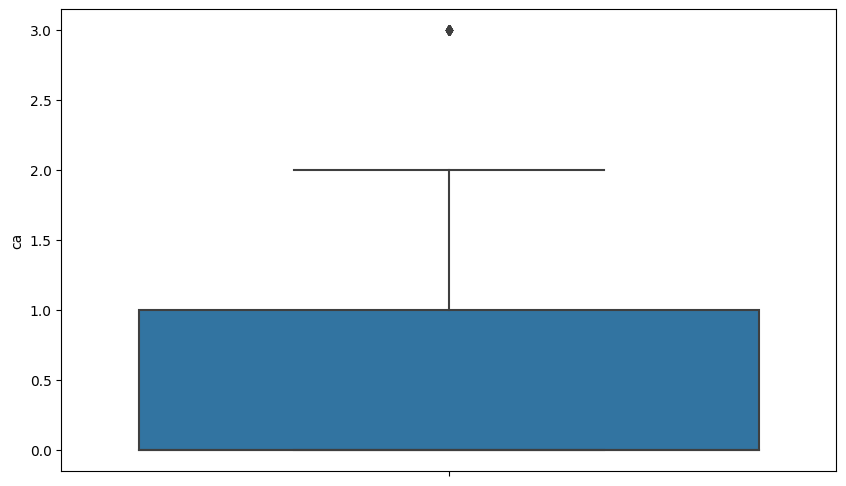

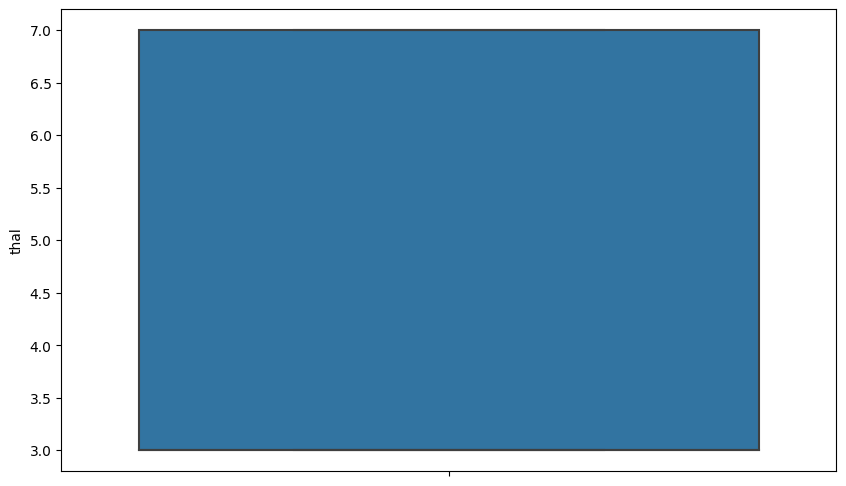

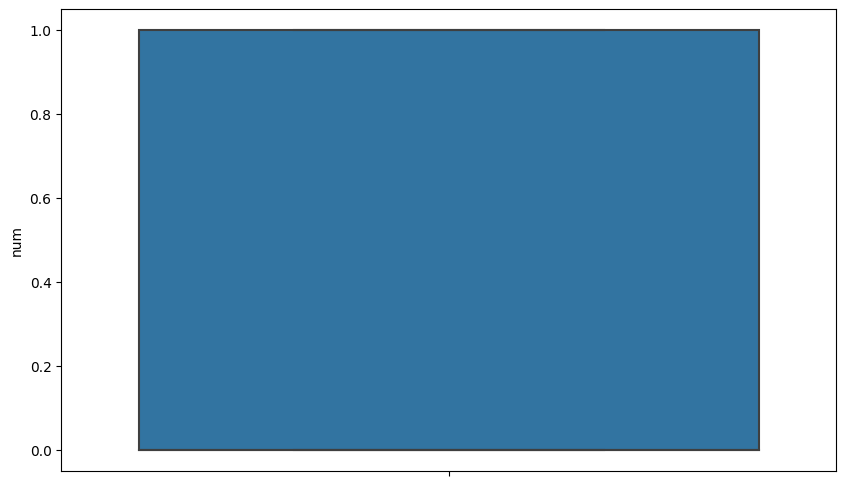

In [5]:
# carrying out the box plot to show the various outliers present
for val in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, y=val)
# from the plot the features that have outliers are 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca'
# but since removing the outliers for the discrete features will eliminate some classes completely...ca, cp, fbs are left untouched

# Establishing the formular for calculating the IQR
# IQR = Q3-Q1
# uppper_bound = Q3 + 1.5 * IQR
# lower_bound = Q1 - 1.5 * IQR

def check_outlier(df):
    outlier_features_check = list()
    for col in df.columns:
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_bound = df[col].quantile(0.25) - 1.5*IQR
        upper_bound = df[col].quantile(0.75) + 1.5*IQR
        if sum(df[df[col] < lower_bound][col]) > 0 or sum(df[df[col] > upper_bound][col]) > 0:
            outlier_features_check.append((col, 'There is outlier'))
        else:
            outlier_features_check.append((col, 'There is no outlier'))
    return outlier_features_check
display(check_outlier(df))
# It implies that seven out of the fourteen features have outliers

# To replace the outliers those values less than the lower bound will be replaced by the minimum value greater than the lower  
# bound while those that are also greater than the upper bound will be replaced with the maximum value less than the upper bound
outlier_features = ['trestbps', 'chol', 'thalach', 'oldpeak'] # ca, fbs and cp features have been removed
def remove_outlier(df):
    for col in outlier_features:
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_bound = df[col].quantile(0.25) - 1.5*IQR
        upper_bound = df[col].quantile(0.75) + 1.5*IQR
        for row in range(len(df)):
            df.loc[row, col] = np.where(df.loc[row, col]<lower_bound, df[df[col] > lower_bound][col].min(), df.loc[row, col])
            df.loc[row, col] = np.where(df.loc[row, col]>upper_bound, df[df[col] < upper_bound][col].max(), df.loc[row, col])
remove_outlier(df) # This removes the outliers successfully
display(check_outlier(df)) # the only outlier present is those of ca, fbs and cp features which were not removed

###### visualization

In [6]:
# statistcal summary
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.00000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.19802,245.402640,0.148515,0.990099,149.663366,0.326733,1.021122,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,16.32129,47.097014,0.356198,0.994971,22.701756,0.469794,1.101511,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.00000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.00000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.00000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.00000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,170.00000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,3.000000,3.000000,7.000000,1.000000


###### univariate plot

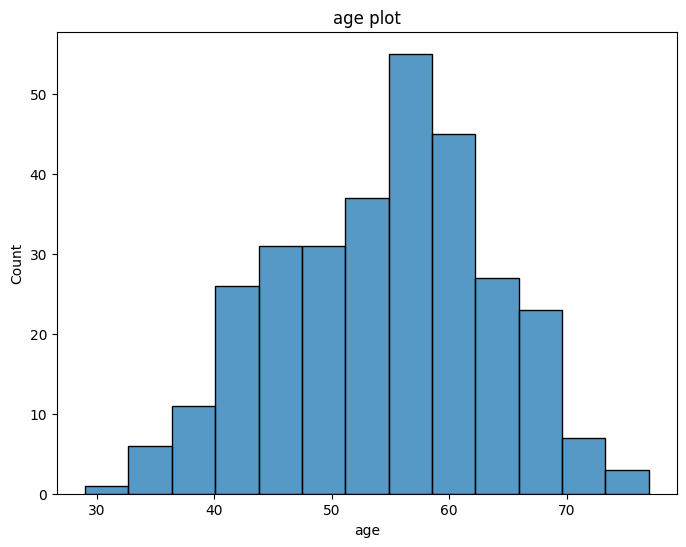

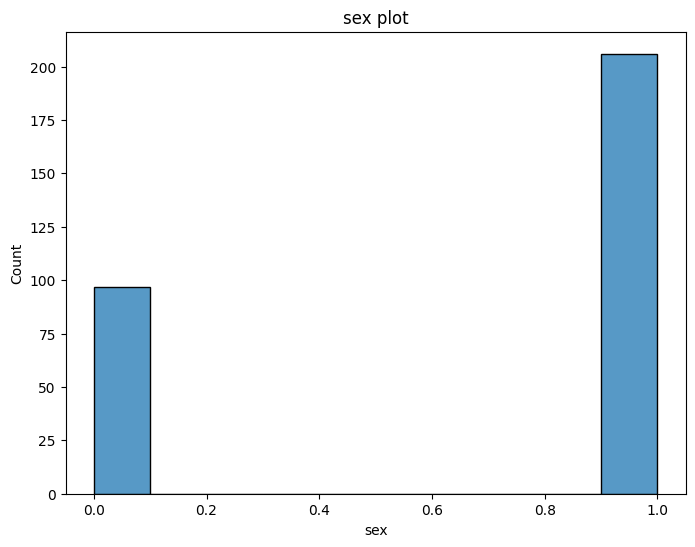

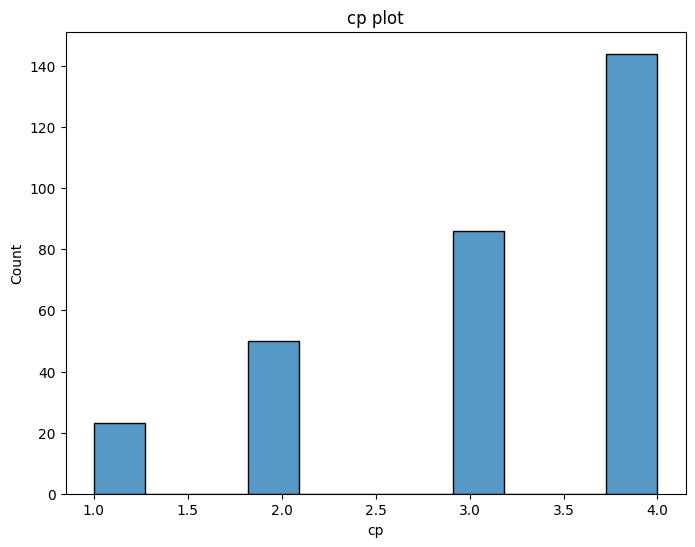

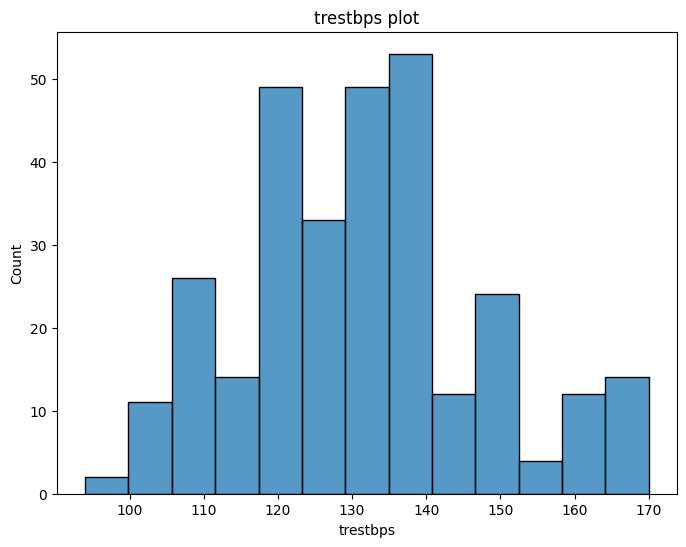

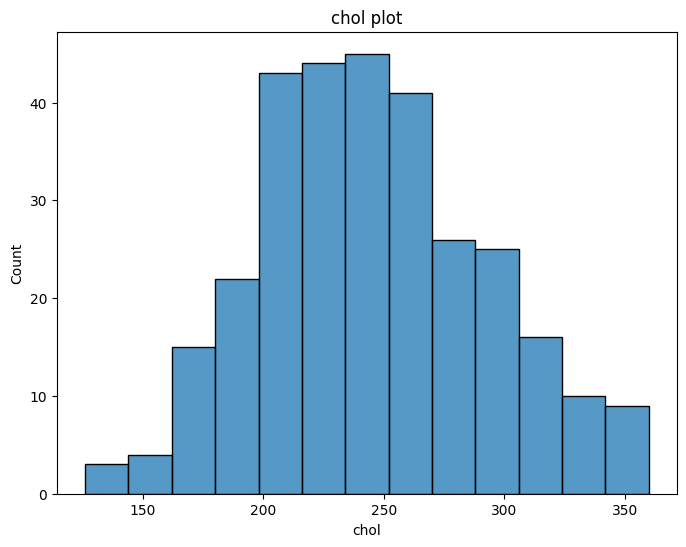

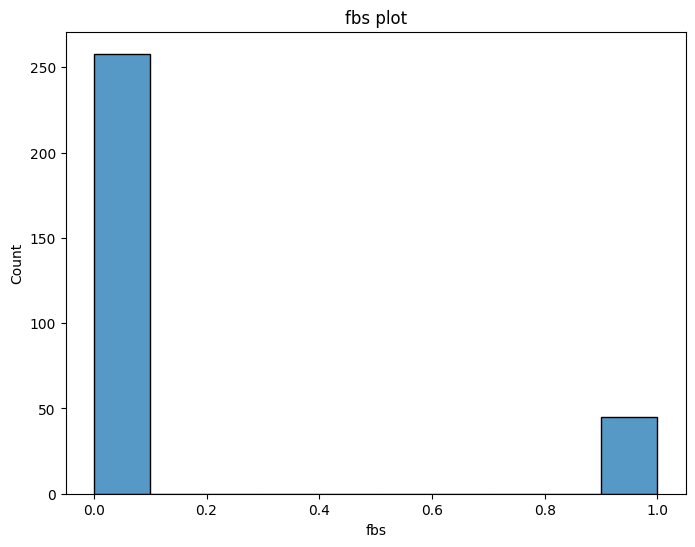

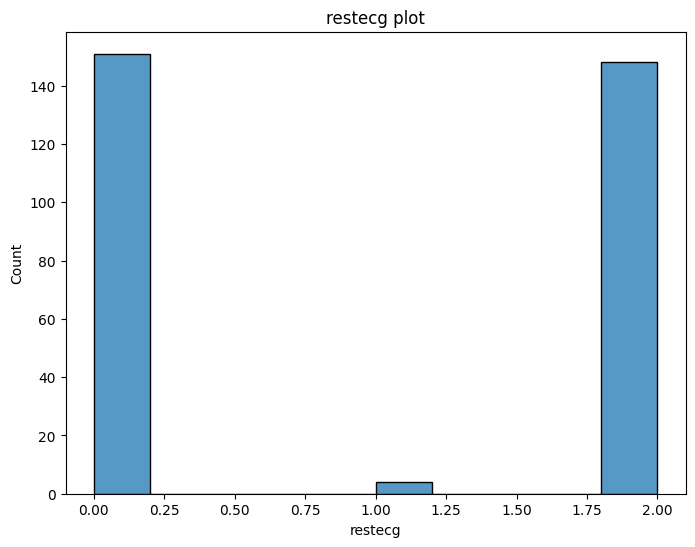

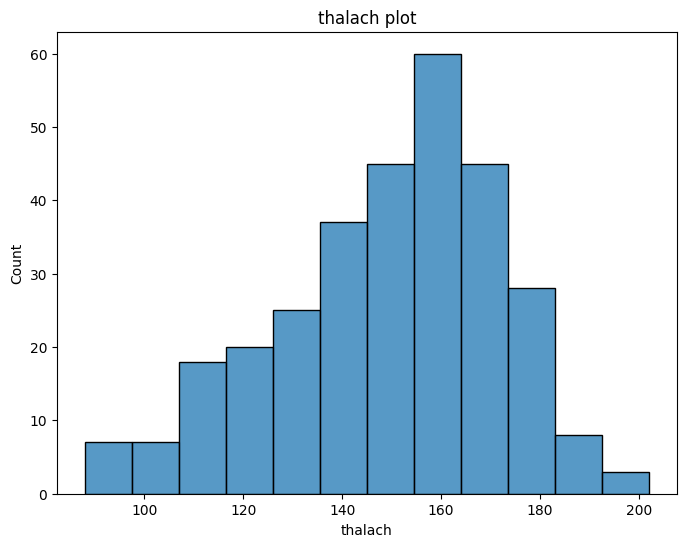

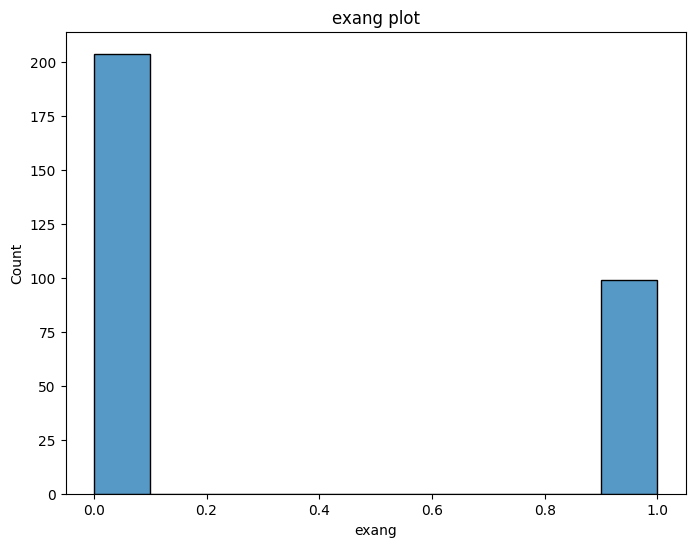

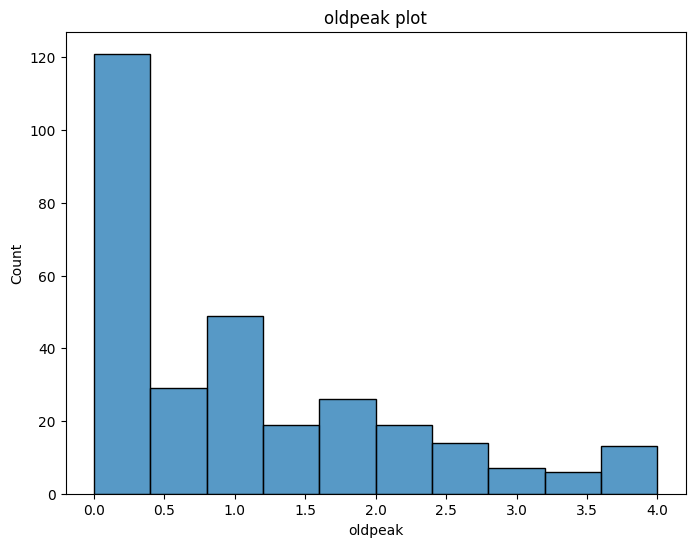

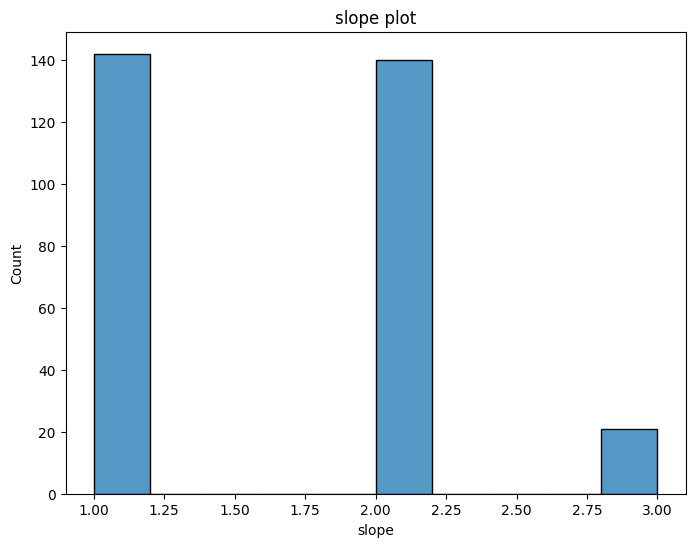

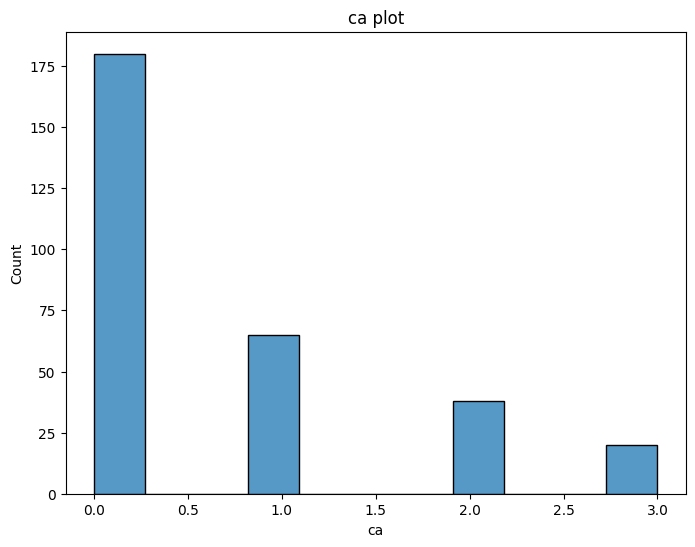

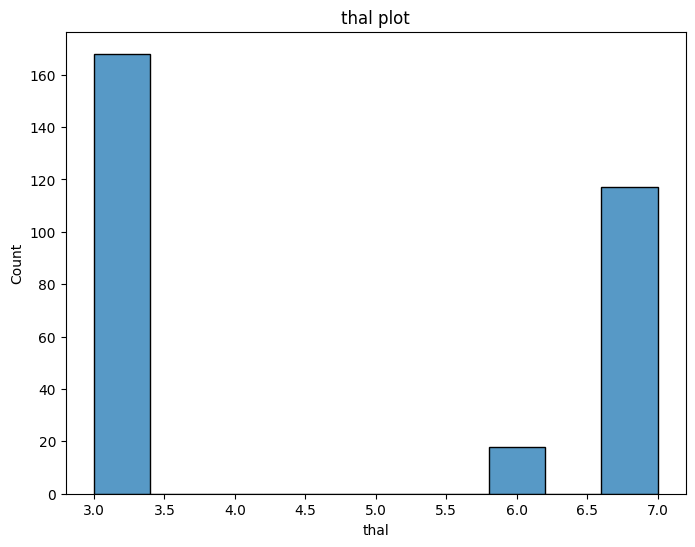

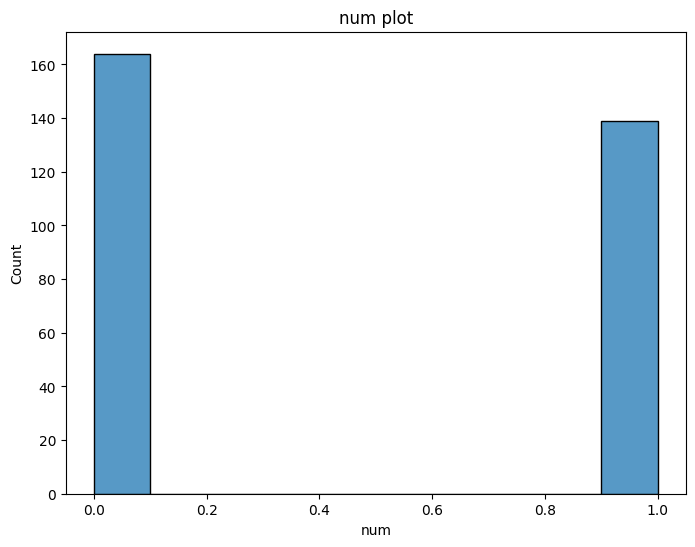

In [7]:
for col in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col) # making a histogram plot for each of the features
    plt.title(f'{col} plot')

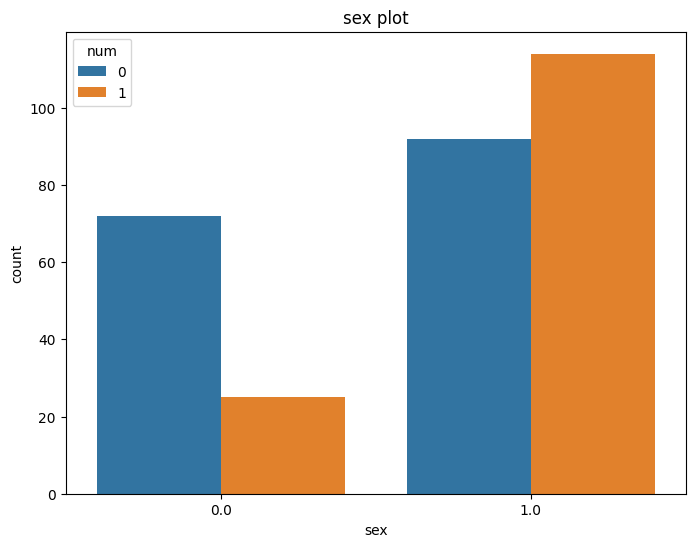

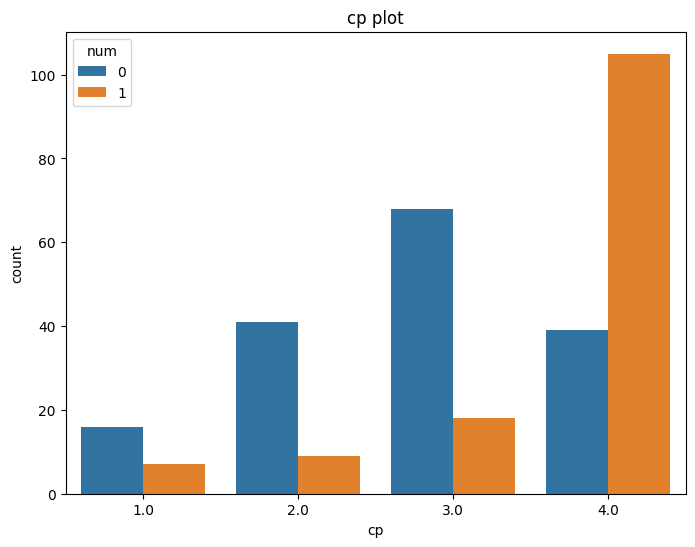

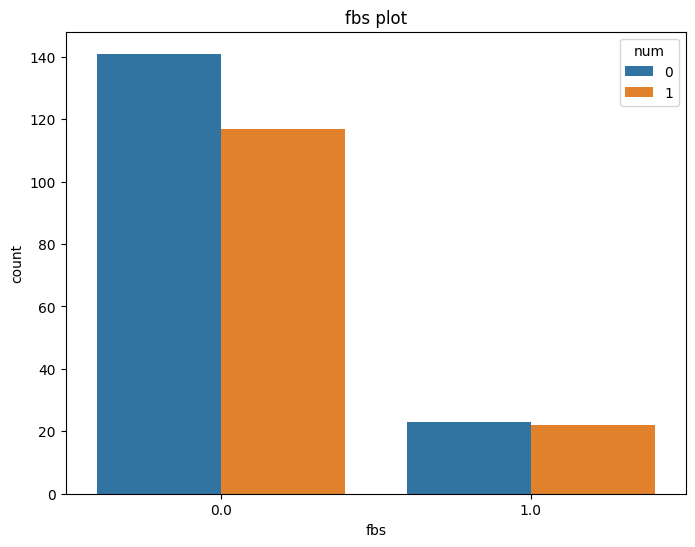

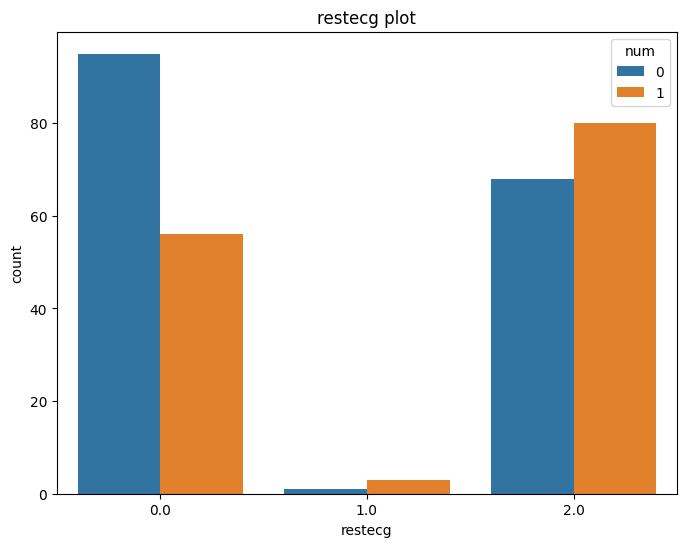

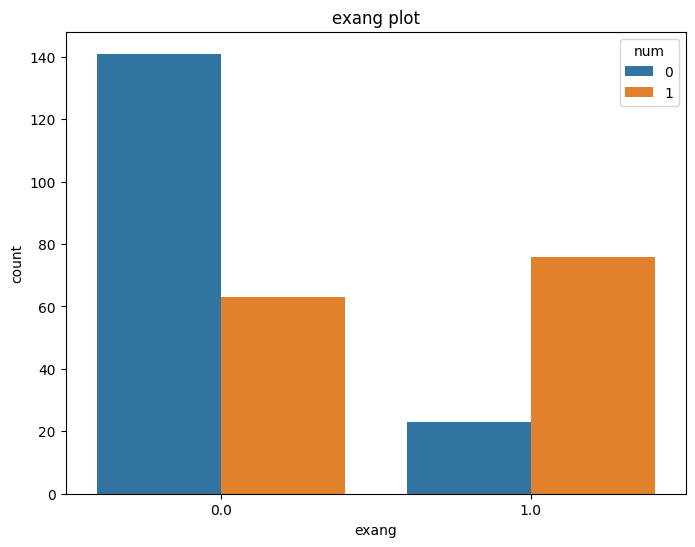

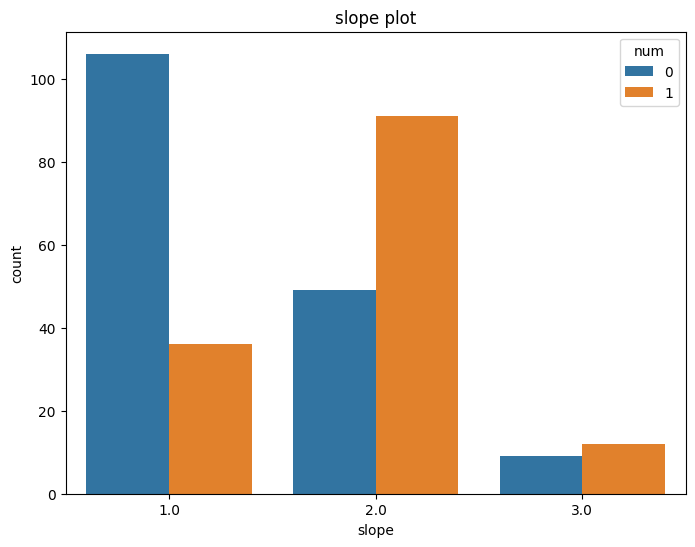

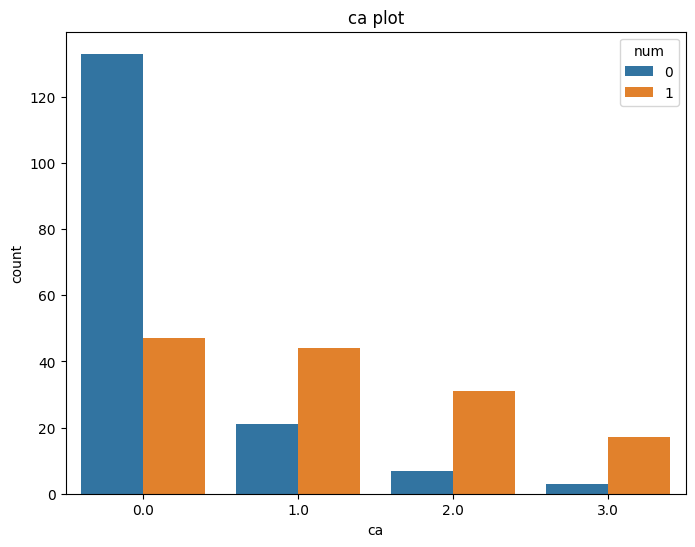

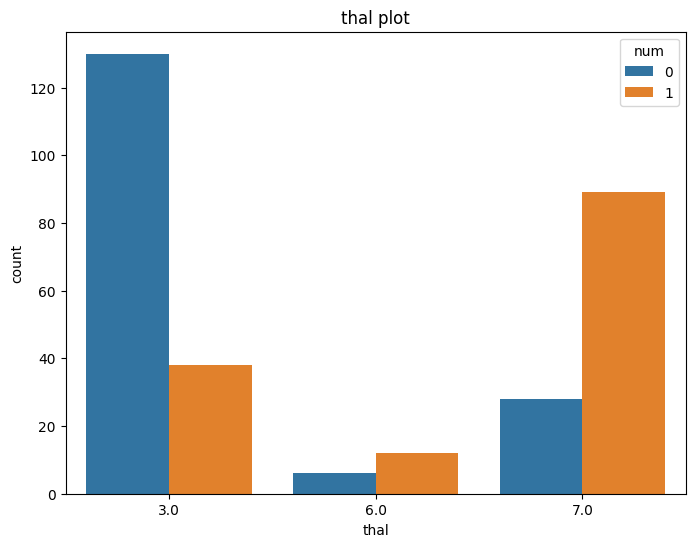

In [8]:
# making univariate plot for discrete variable showing how they affect the num features(whether a person has heart disease or not)
discrete_col = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']
for col in discrete_col:
    if col != 'num':
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=col, hue='num') # making a histogram plot for each of the features
        plt.title(f'{col} plot')

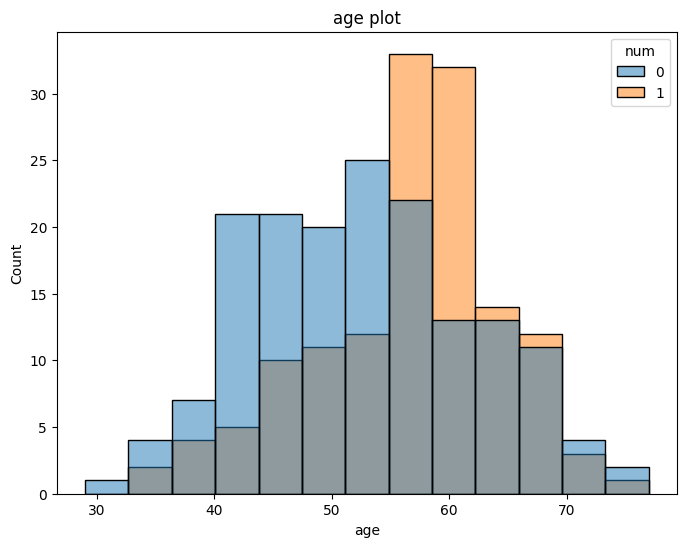

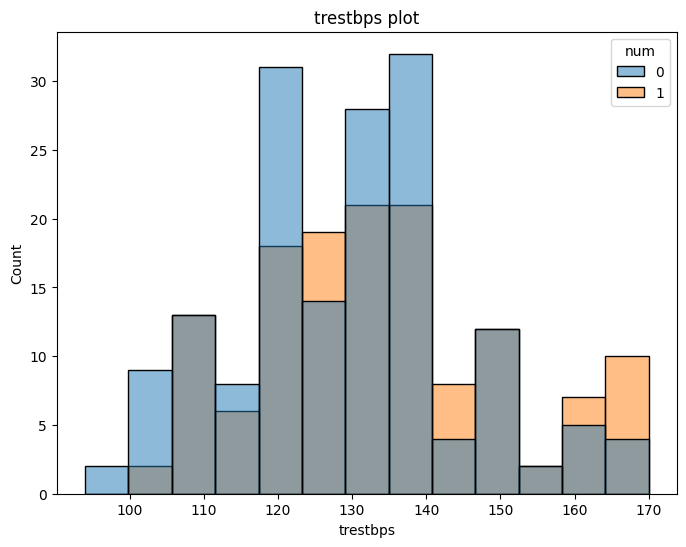

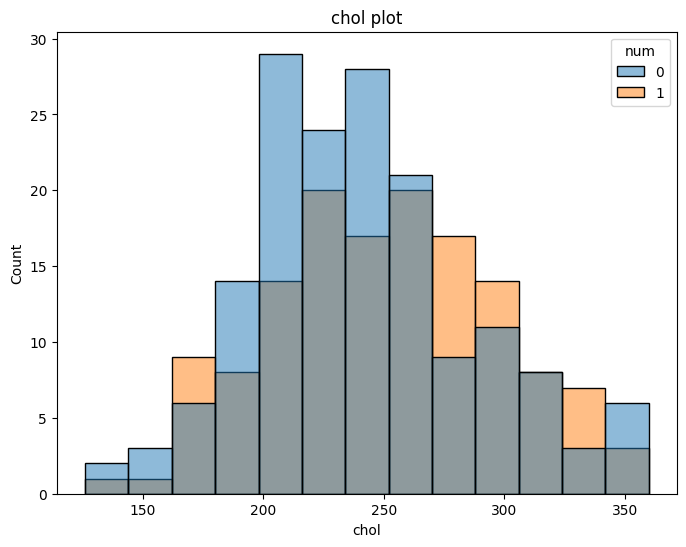

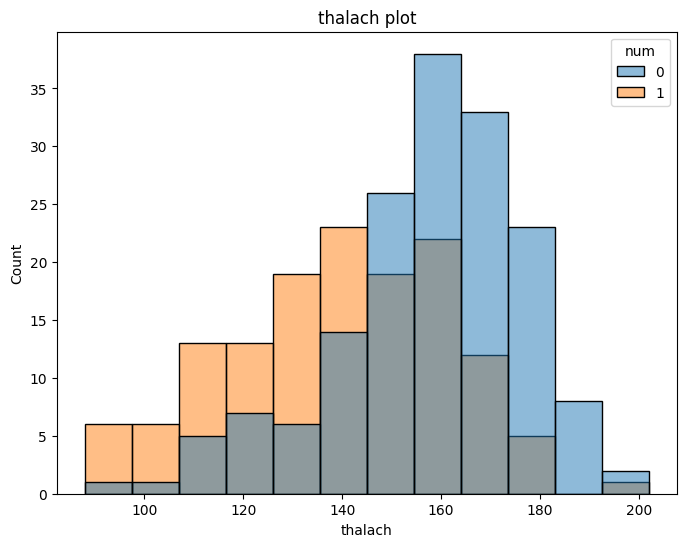

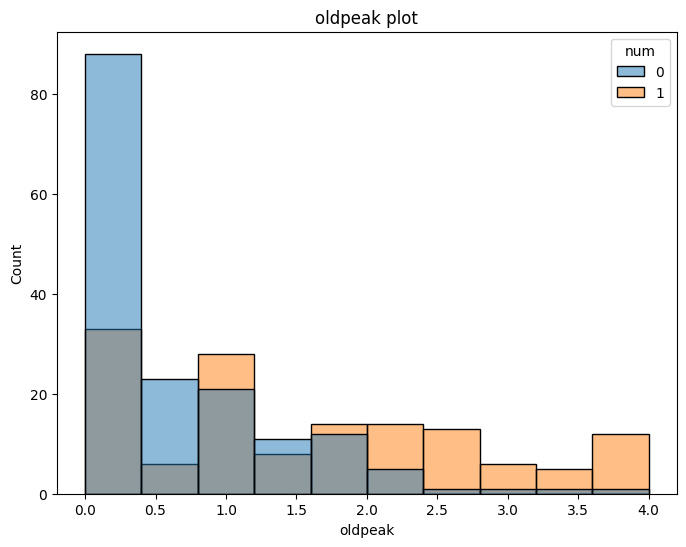

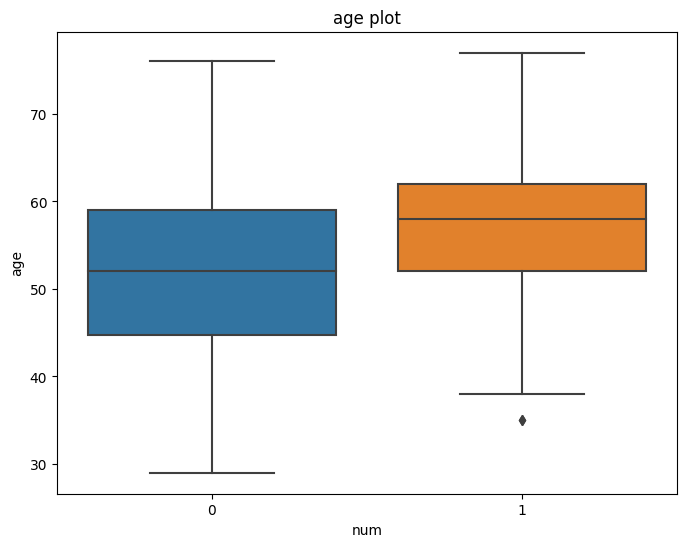

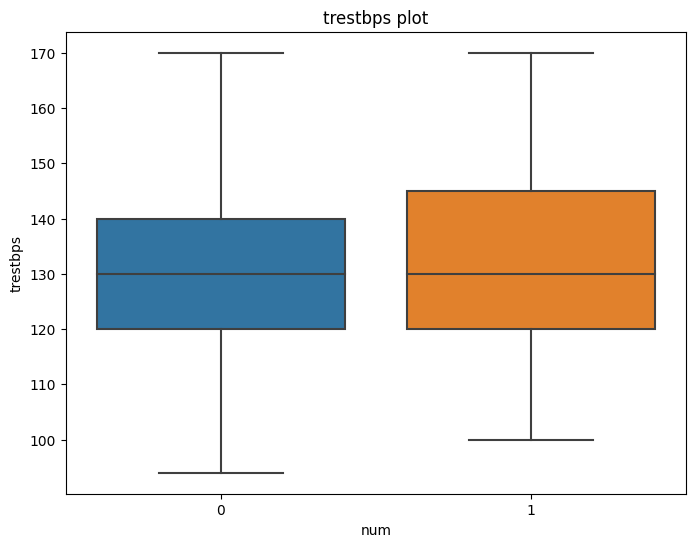

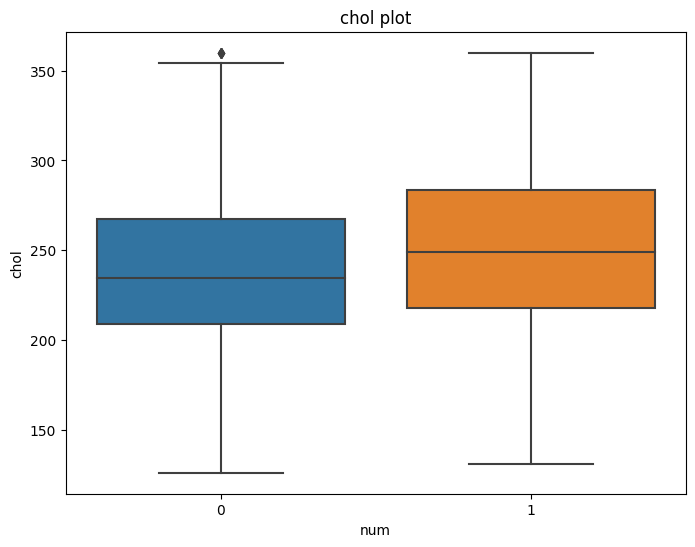

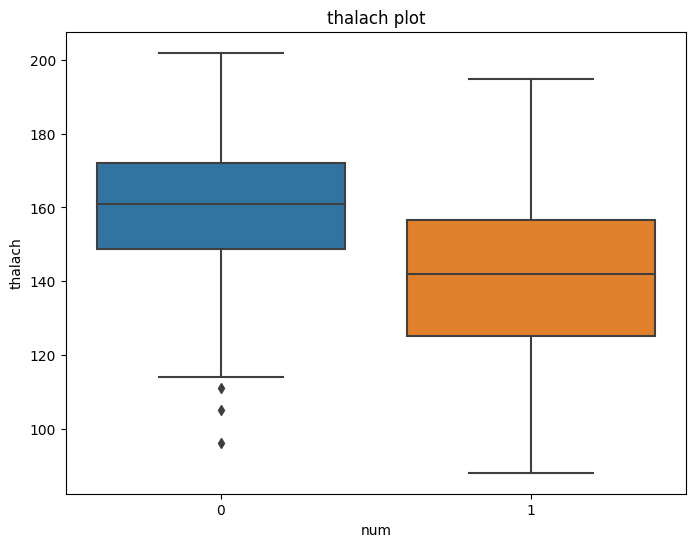

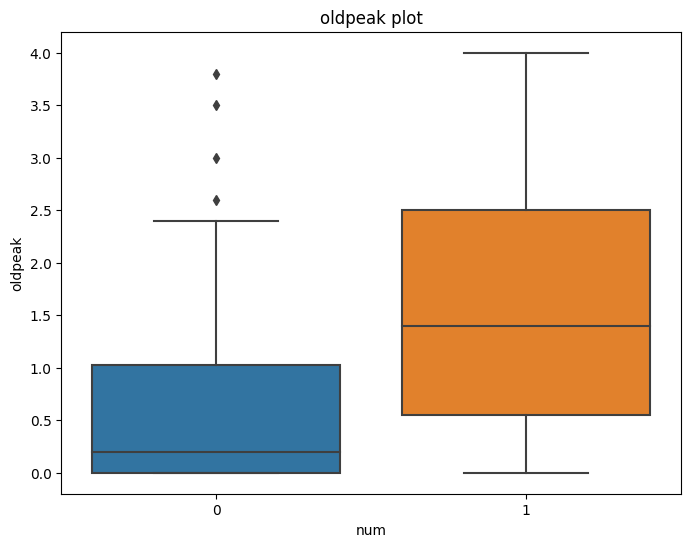

In [9]:
# making univariate plot for continuous variable showing the range that has heart disease or not using histogram
continuous_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for continuous in continuous_col:
    plt.figure(figsize=(8, 6))
    sns.histplot(df, x=continuous, hue='num')
    plt.title(f"{continuous} plot")

# making univariate plot for continuous variable showing the range that has heart disease or not using boxplot   
for continuous in continuous_col:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df, y=continuous, x='num')
    plt.title(f"{continuous} plot")

    
quantile_list = list()
for col in continuous_col:
    lower_limit = df[df['num']==1][col].quantile(0.25)
    upper_limit = df[df['num']==1][col].quantile(0.75)
    quantile_list.append((col, lower_limit, upper_limit))

###### Bivariate plot

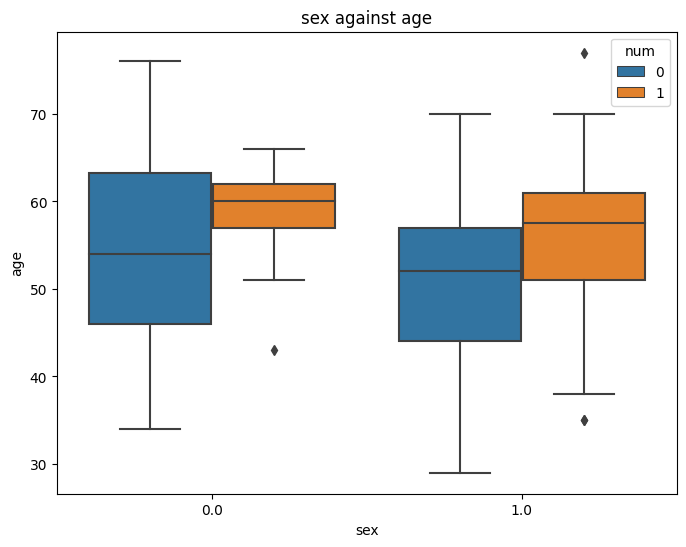

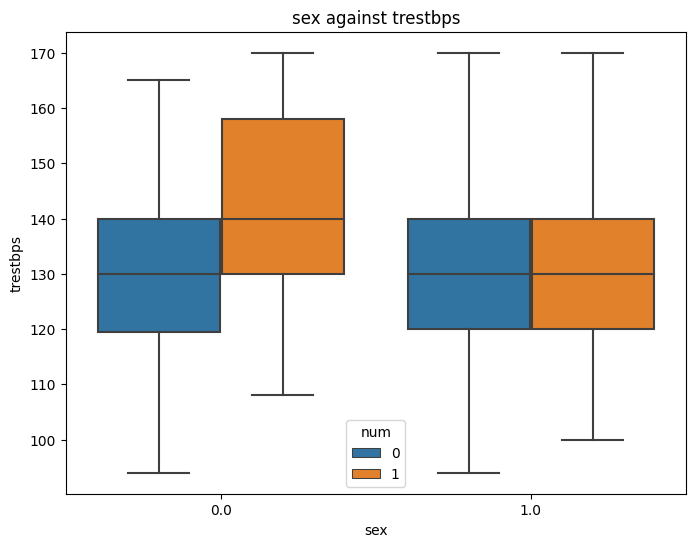

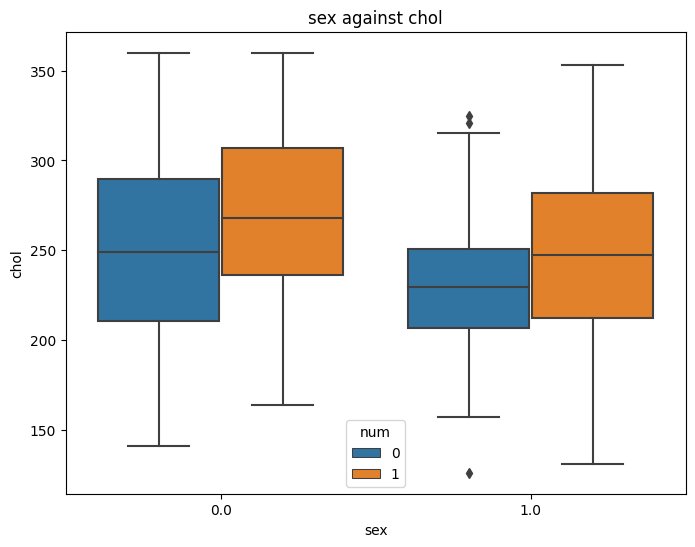

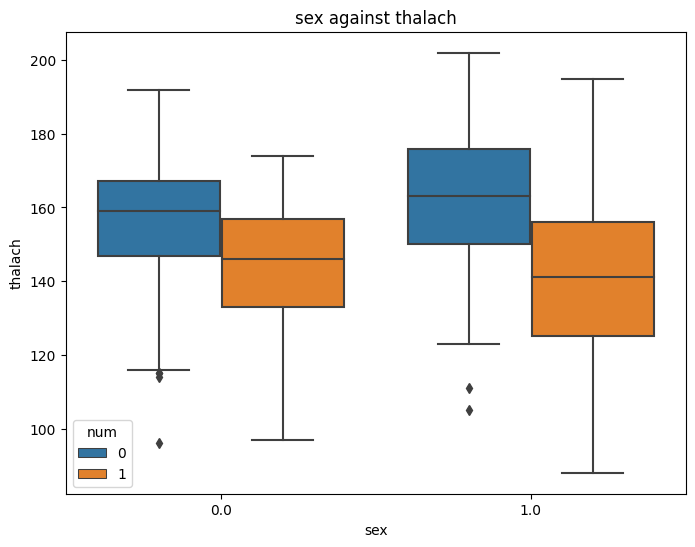

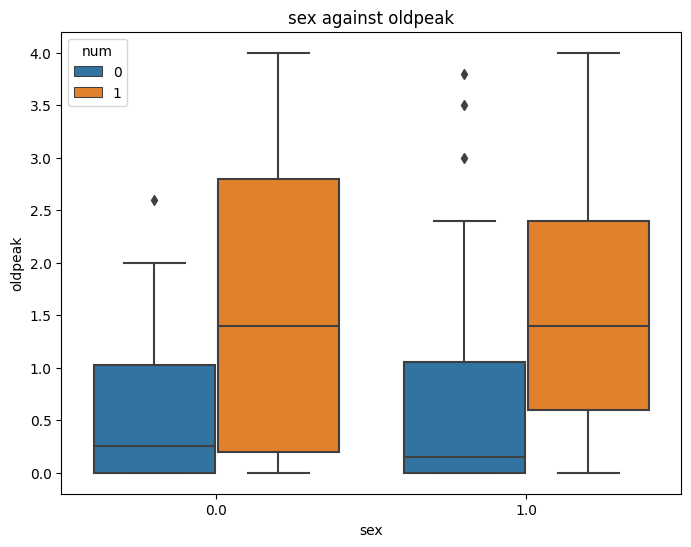

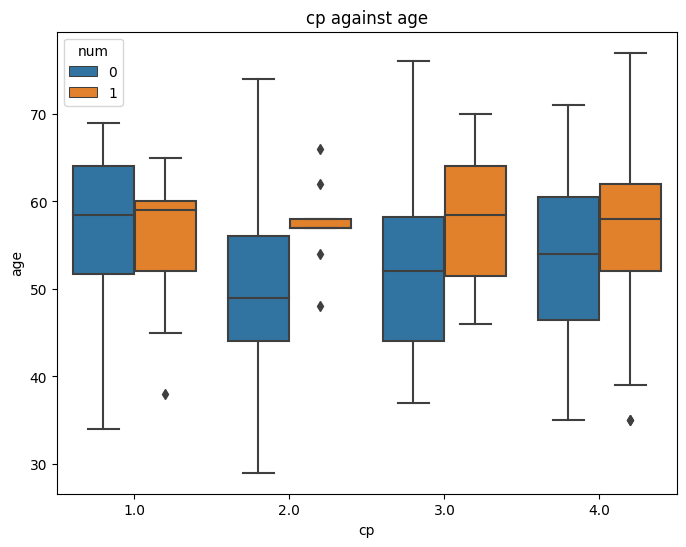

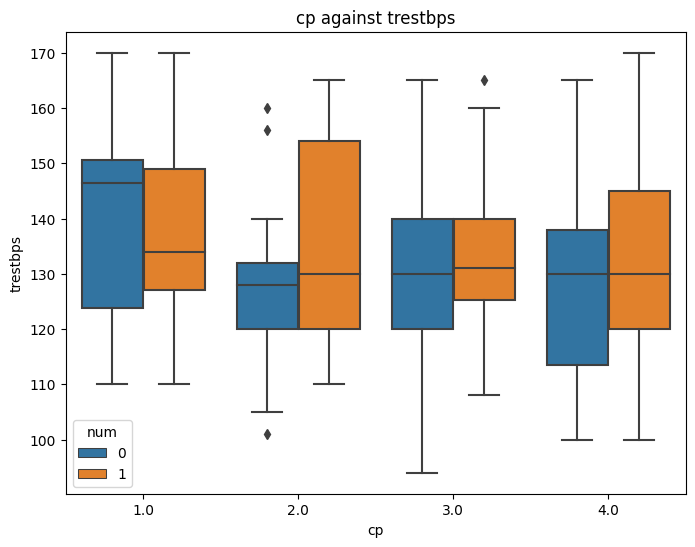

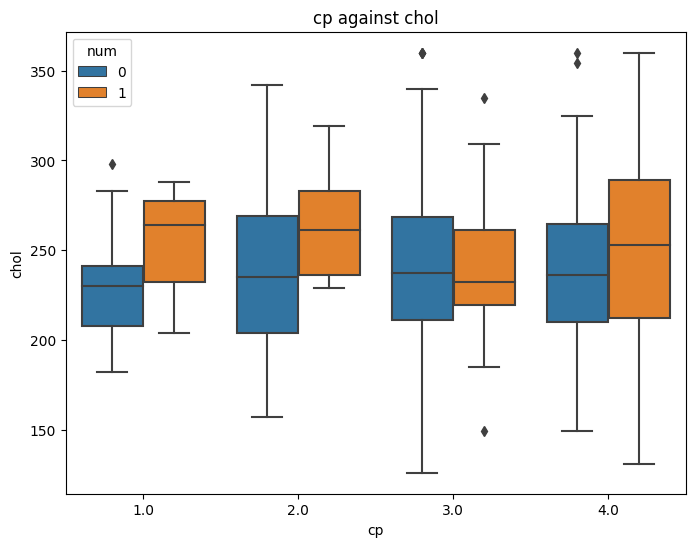

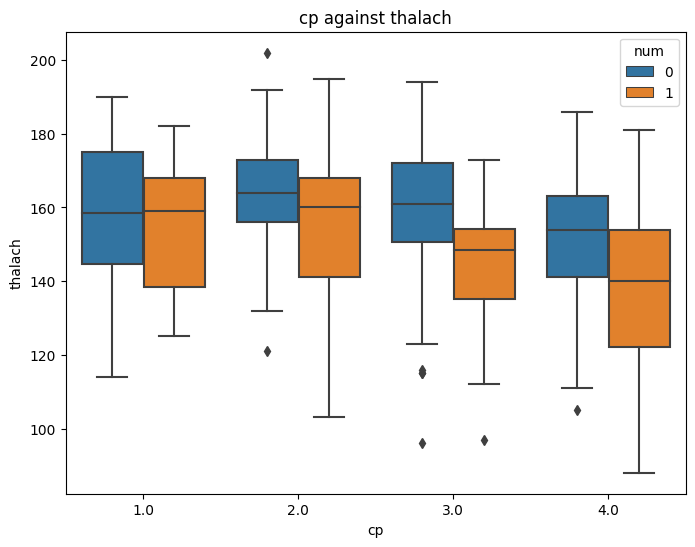

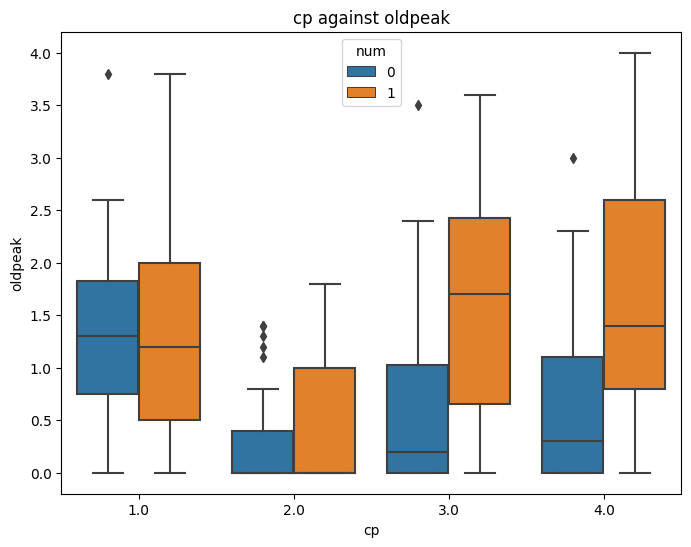

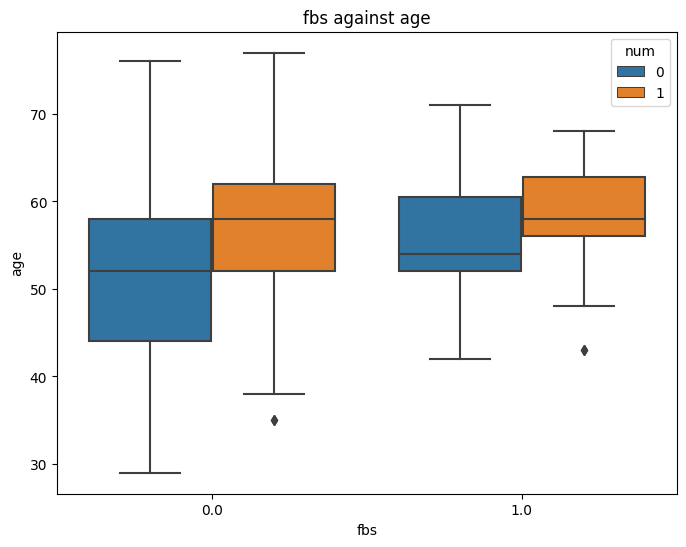

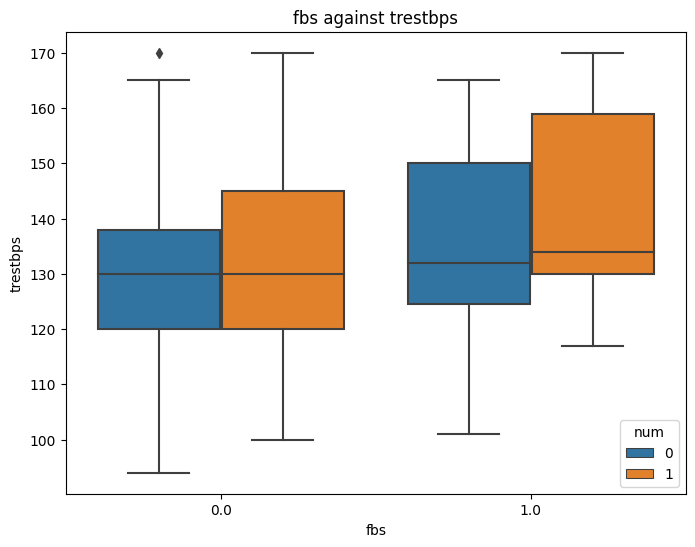

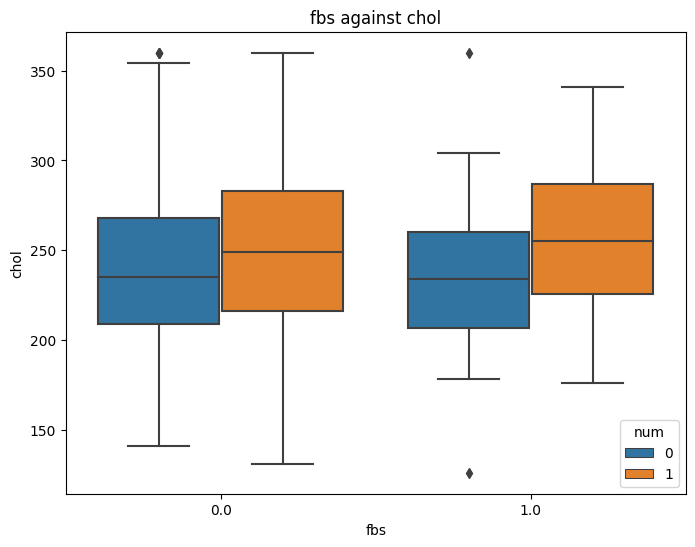

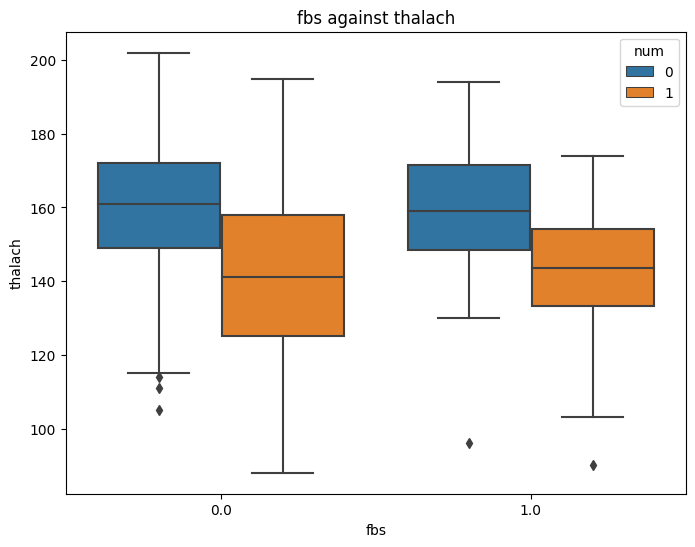

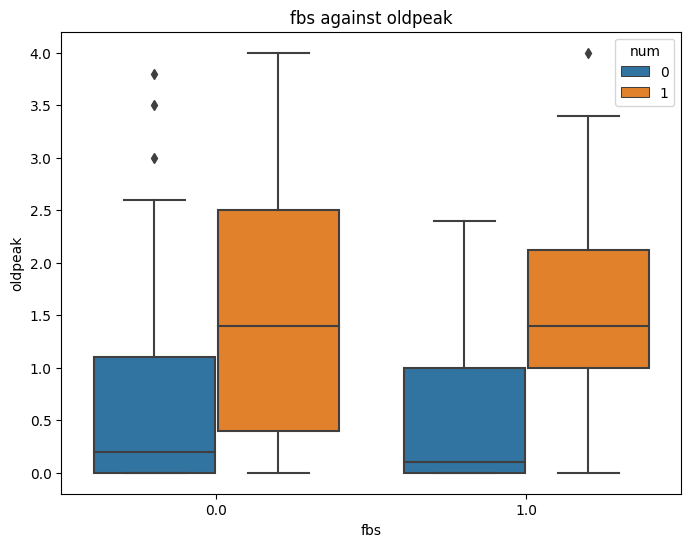

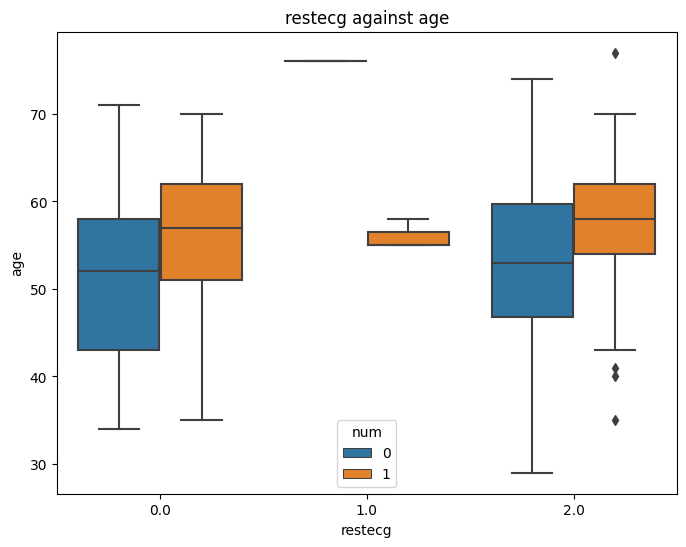

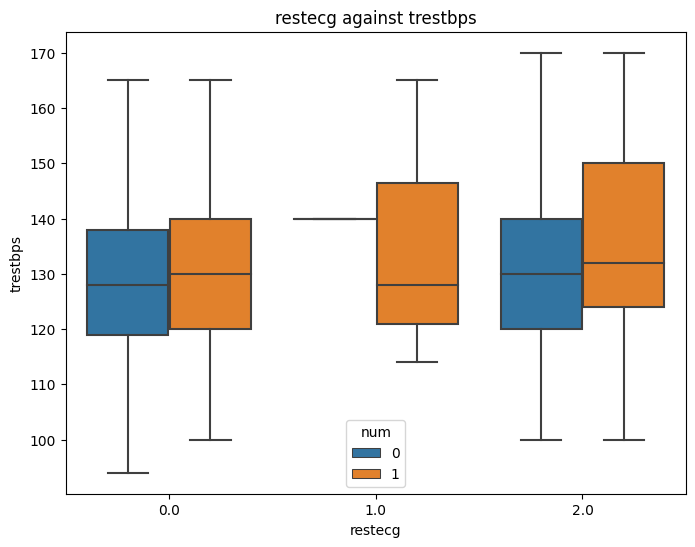

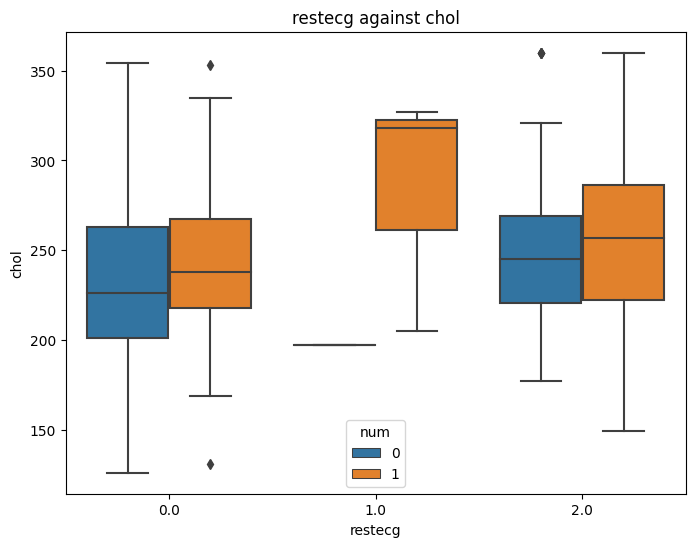

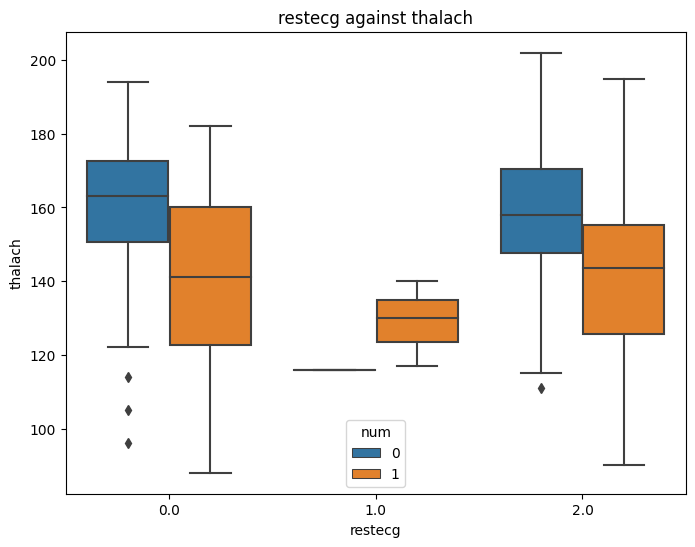

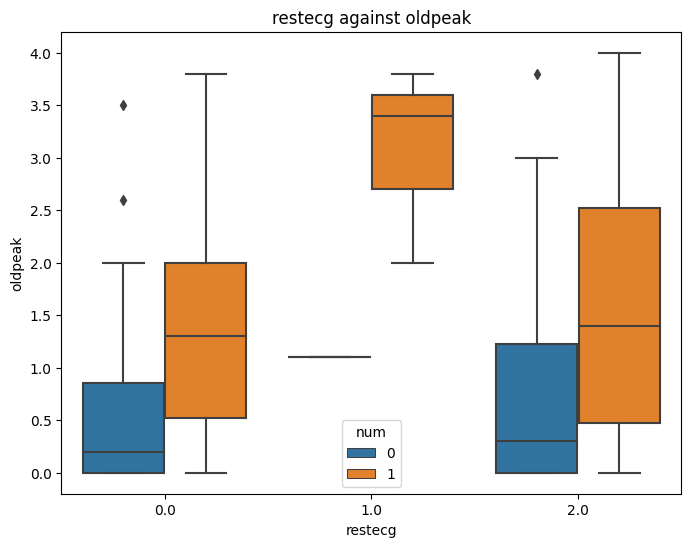

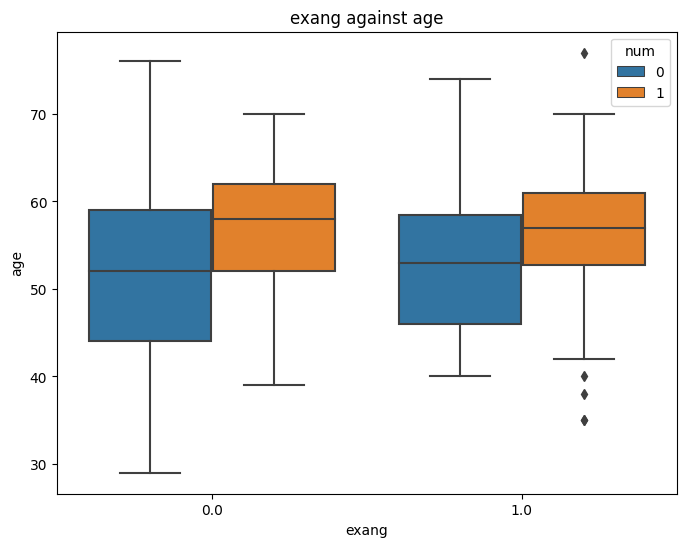

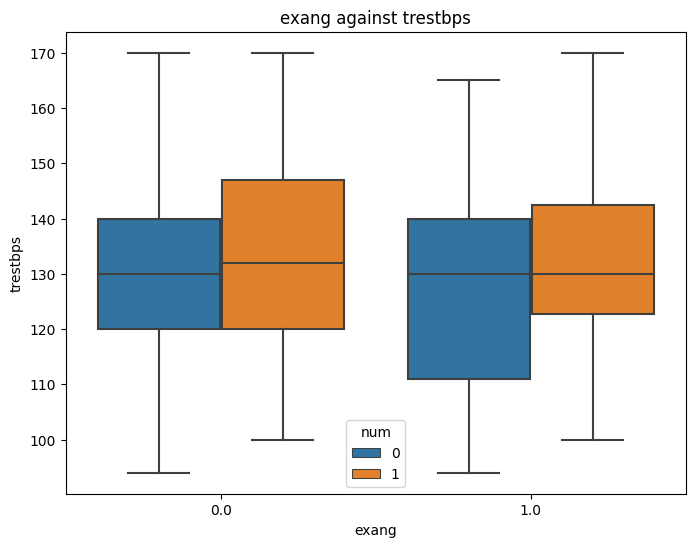

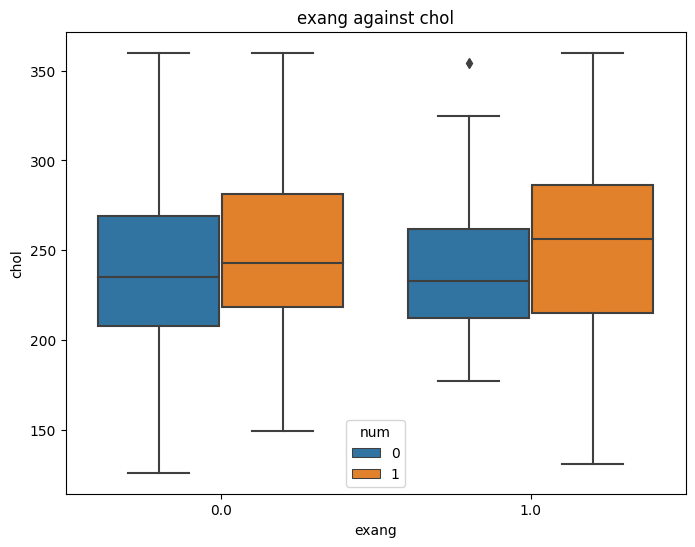

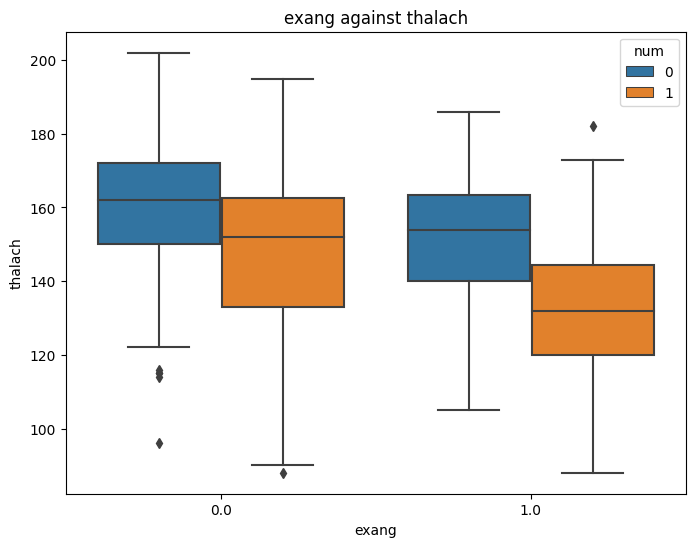

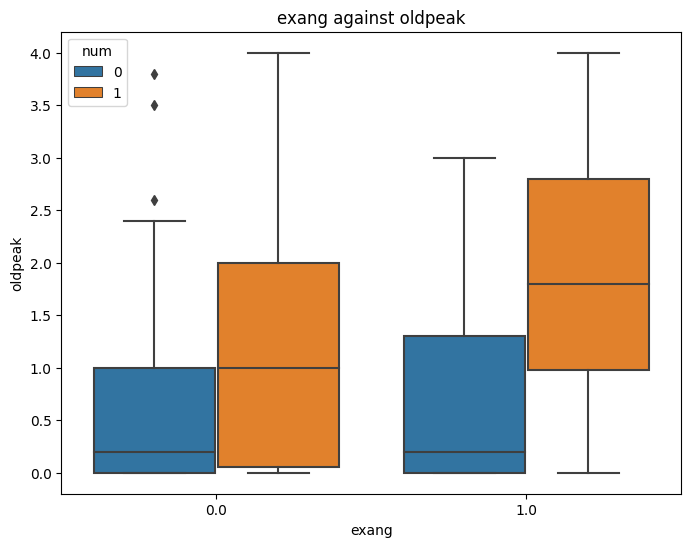

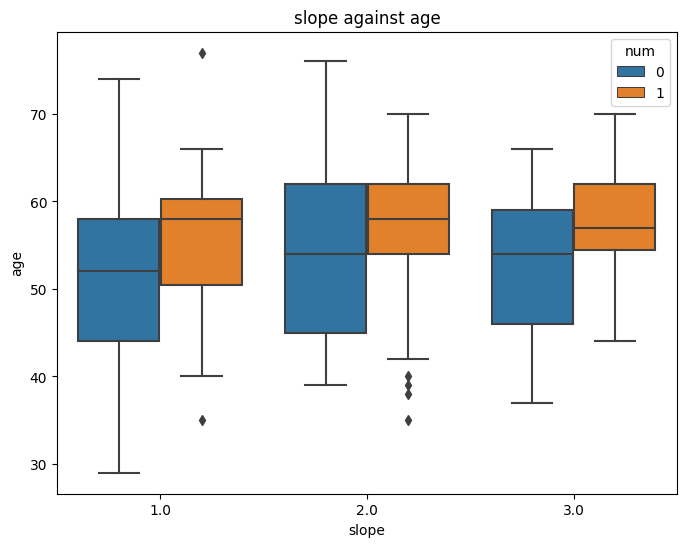

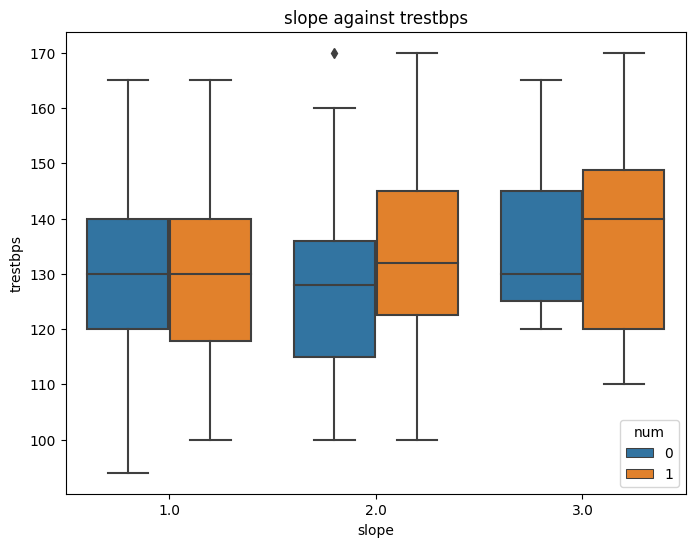

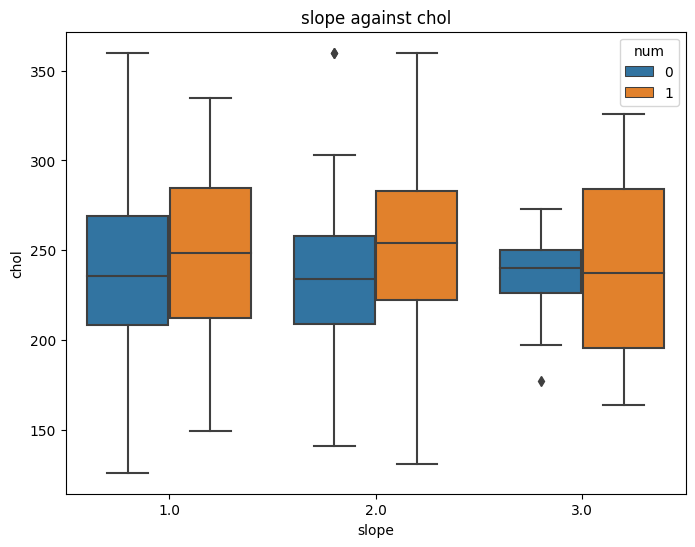

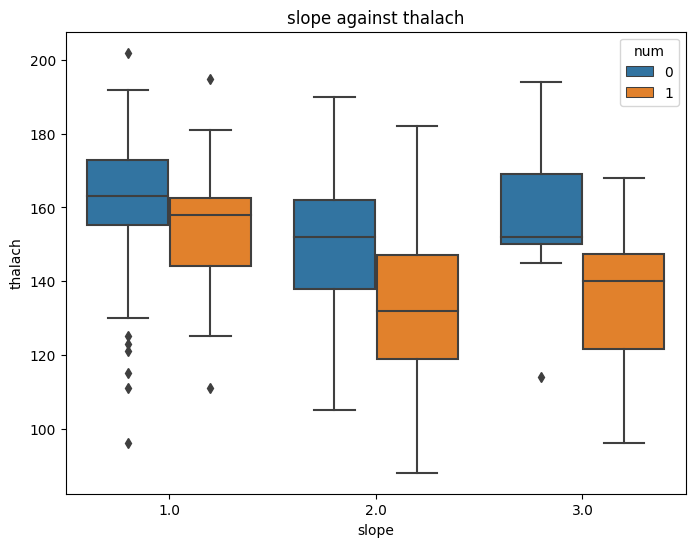

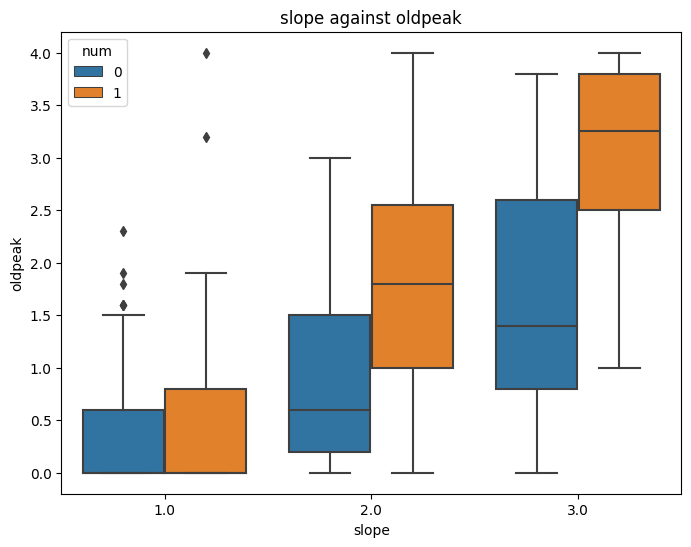

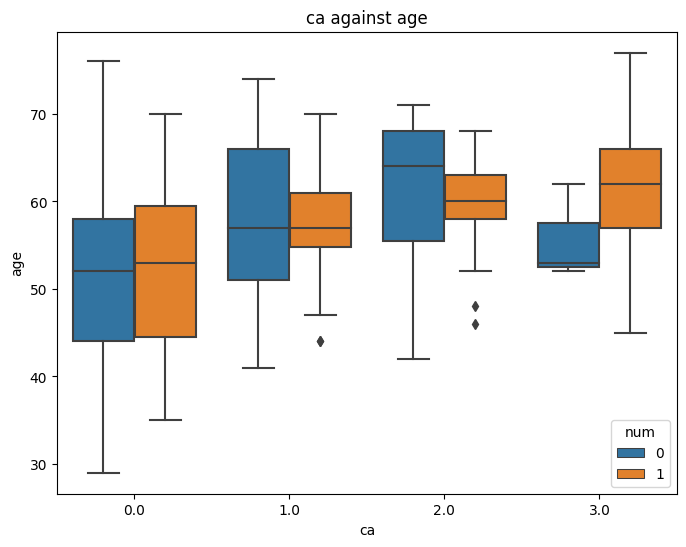

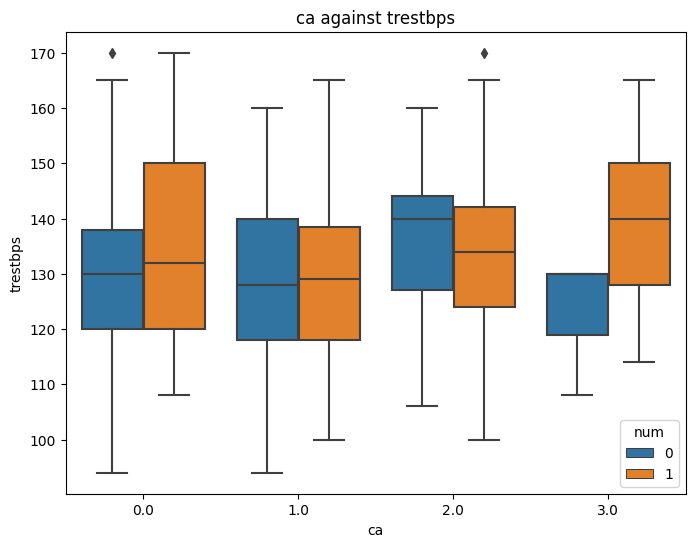

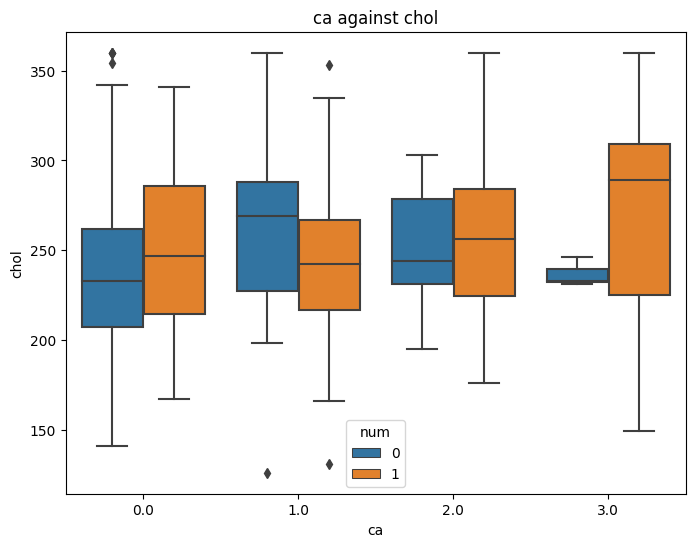

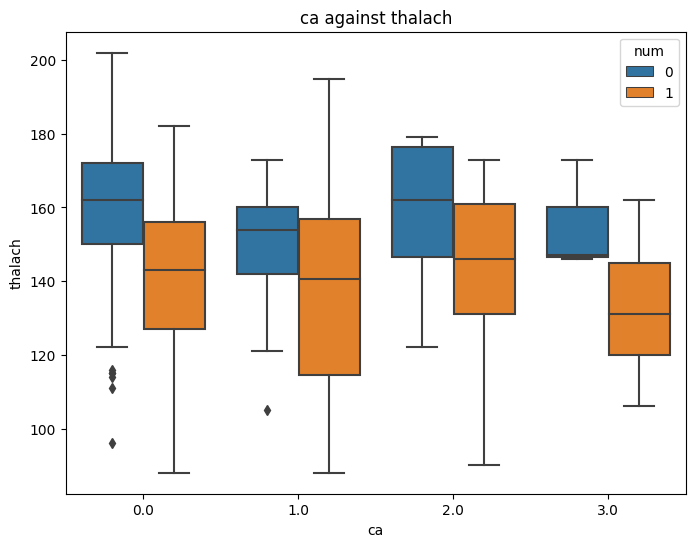

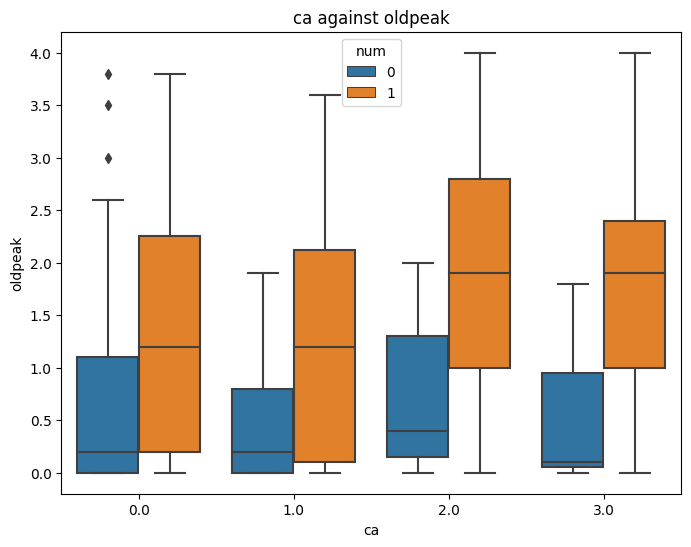

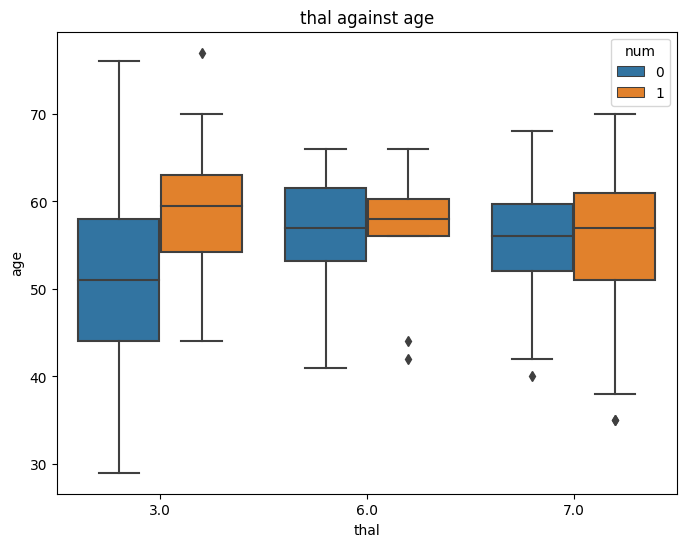

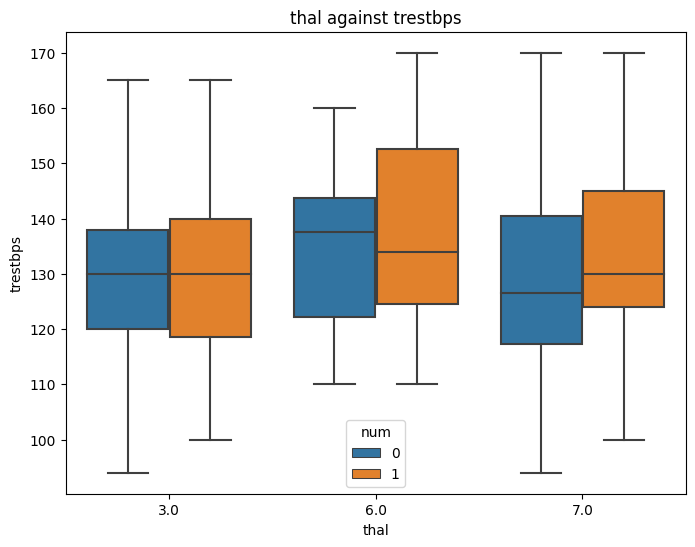

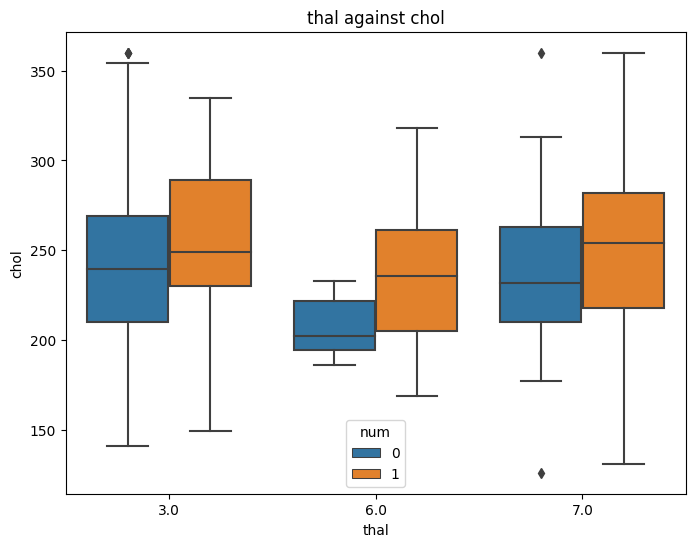

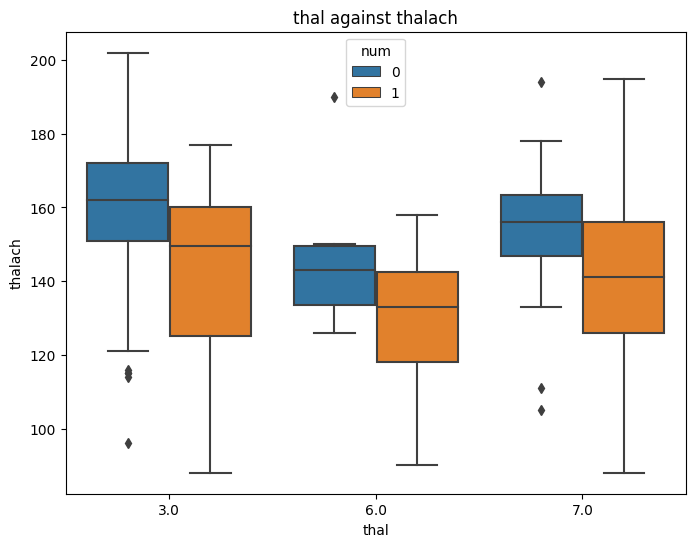

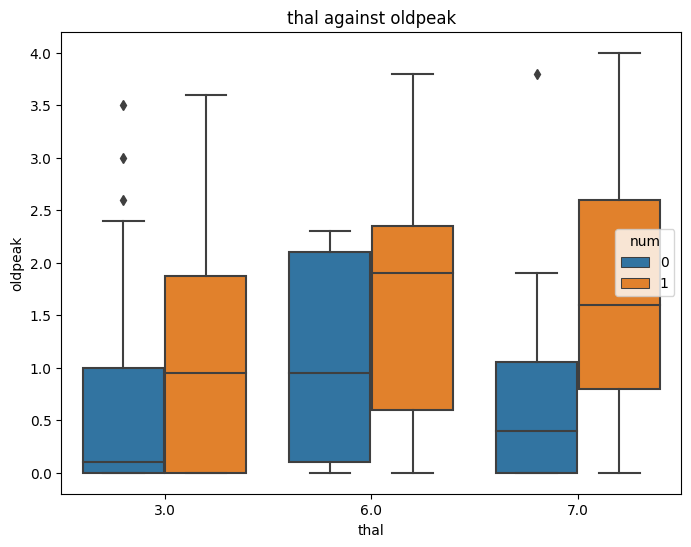

In [10]:
for col1 in discrete_col:
    for col2 in continuous_col:
        if col1 != col2 and col1 != 'num':
            plt.figure(figsize=(8, 6))
            sns.boxplot(data=df, x=col1, y=col2, hue='num')
            plt.title(f'{col1} against {col2}')

###### Advanced graphs

In [11]:
# For making plots of more than two dimensions the principal components of the data is found...then the principal components can
# be plotted against each other.
pca_input_columns = df.drop('num', axis=1)
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # get pca model

principalComponents = pca.fit_transform(df) # transforms the two components
df['pca1'] = principalComponents[:,0]
df['pca2'] = principalComponents[:,1]
display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,pca1,pca2
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,11.260547,2.841211
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1,-43.083986,44.801216
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,16.227995,21.927590
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,-3.386434,-39.883742
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,42.165460,-23.468835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,-17.176523,13.153758
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1,50.906821,13.492421
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1,113.698574,37.038738
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,9.608317,-23.293334


In [12]:
pca1_coefficients, pca2_coefficients = np.round(abs(pca.components_[0]), 4), np.round(abs(pca.components_[1]), 4)
pd.DataFrame.from_records(list(zip(pca_input_columns, pca1_coefficients, pca2_coefficients)), columns=['features', 'pca1', 'pca2'])

,features,pca1,pca2
0,age,0.0410,0.1801
1,sex,0.0018,0.0009
2,cp,0.0015,0.0135
3,trestbps,0.0555,0.0947
4,chol,0.9975,0.0236
5,fbs,0.0001,0.0004
6,restecg,0.0035,0.0042
7,thalach,0.0111,0.9780
8,exang,0.0008,0.0076
9,oldpeak,0.0012,0.0174


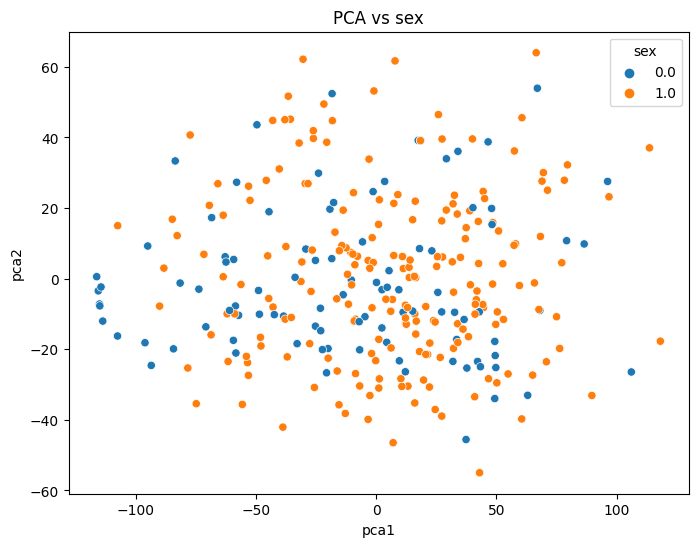

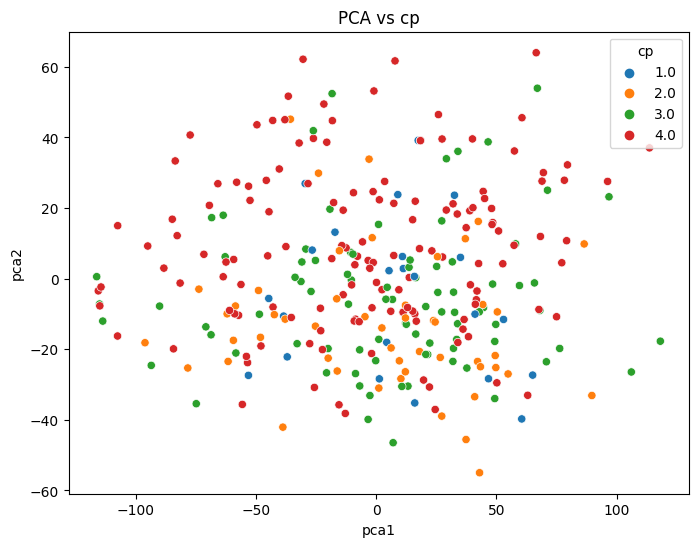

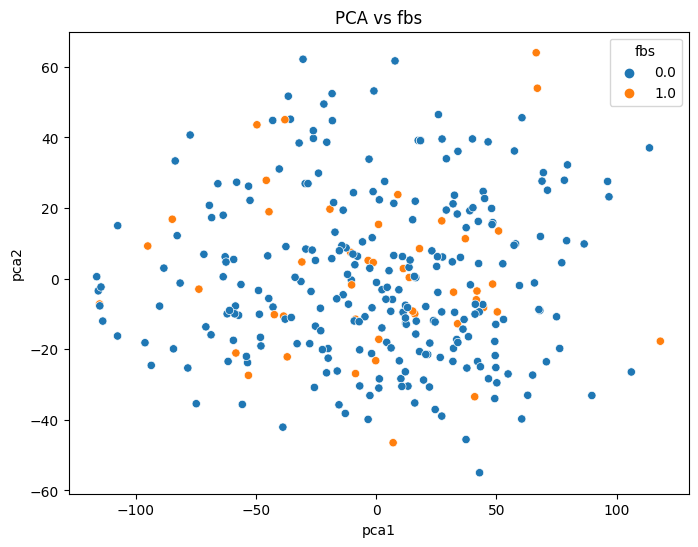

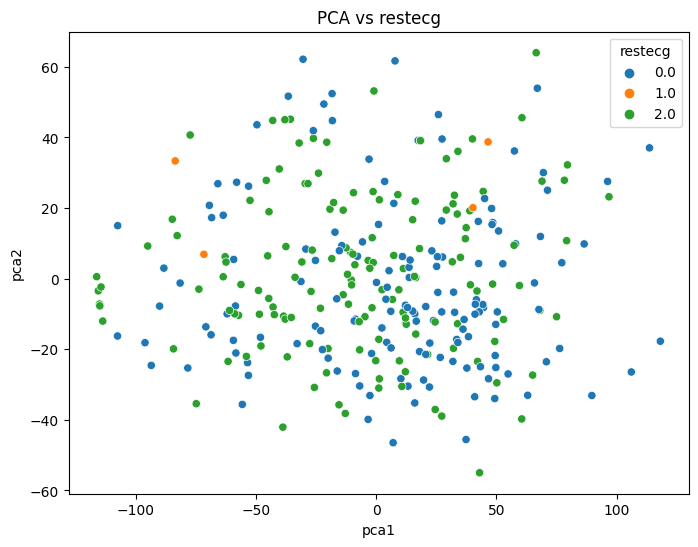

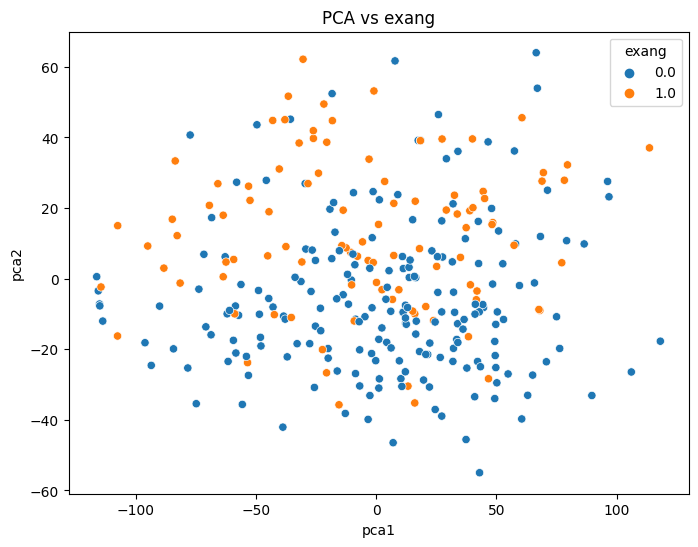

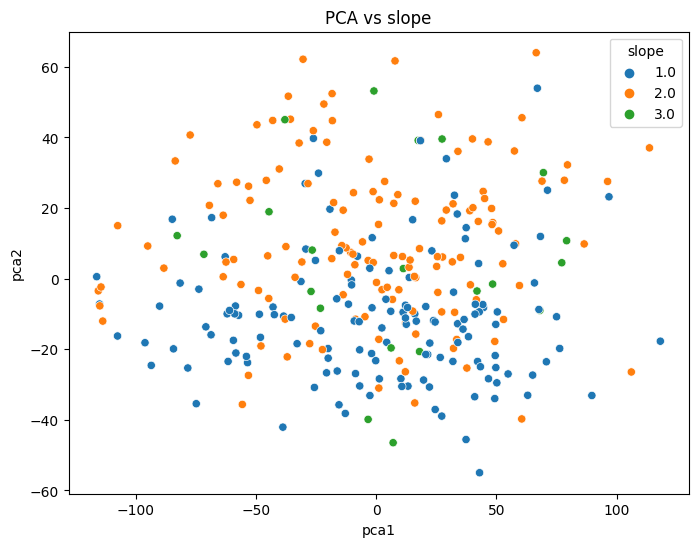

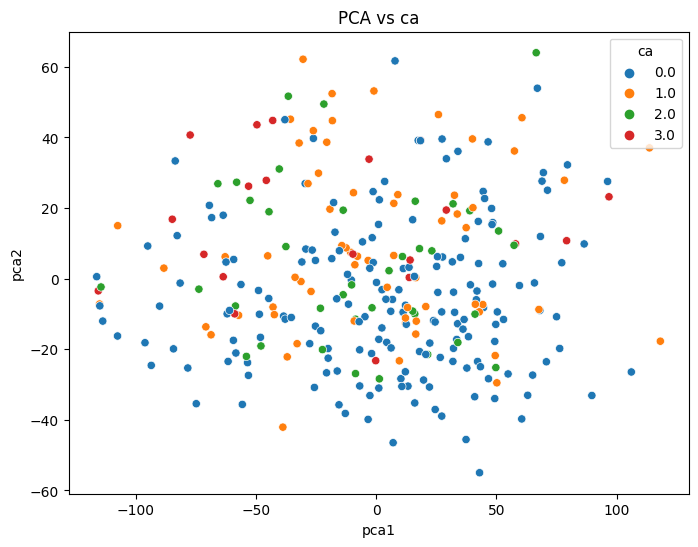

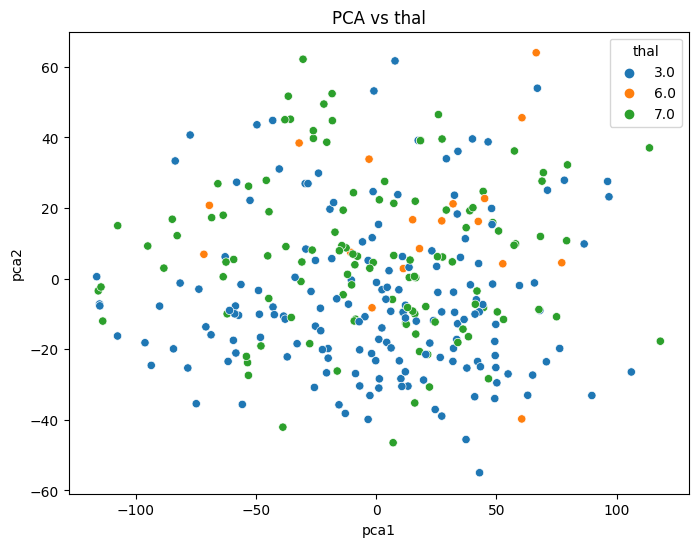

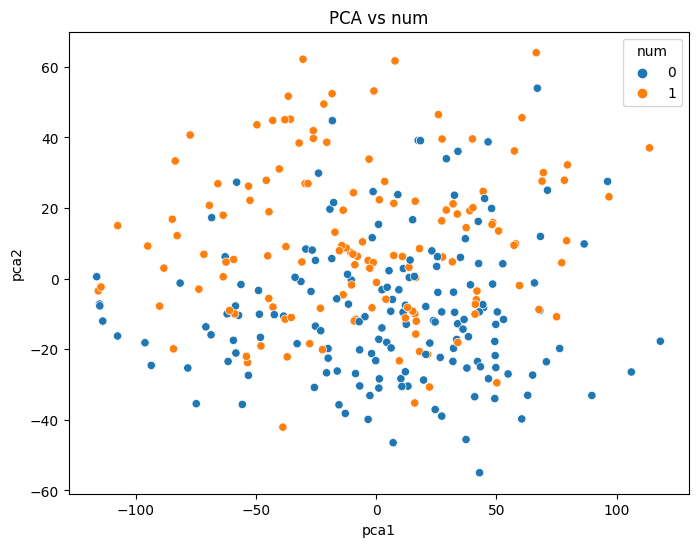

In [13]:
# plotting the various principal component analysis against the various features 
for col in discrete_col:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='pca1', y='pca2',hue=col, data=df, palette='tab10')
    plt.title(f'PCA vs {col}')

###### Relationship between variables

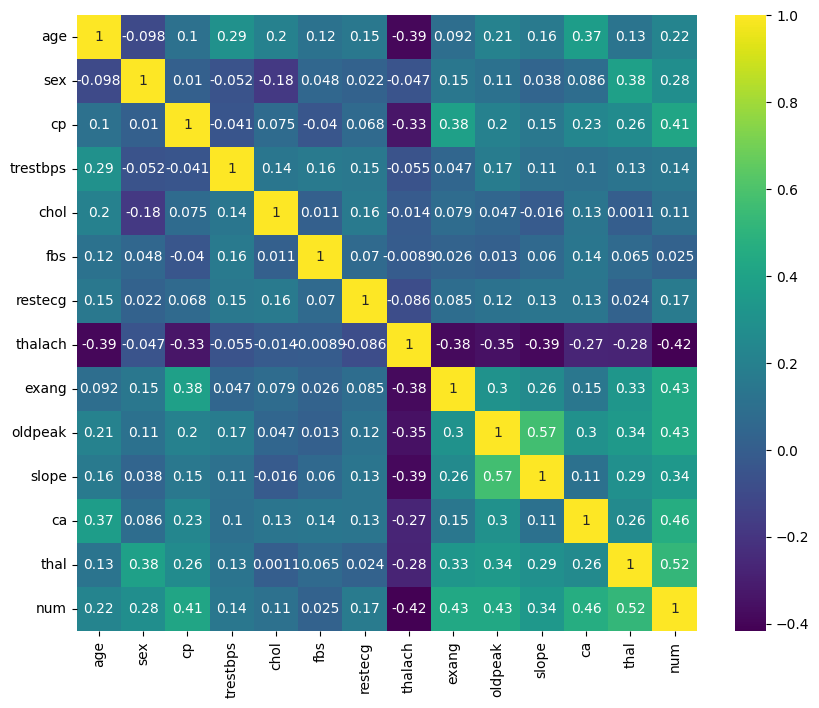

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, :-2].corr(), annot=True, cmap='viridis'); # This shows the correlation between two variables

###### Model Building

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
df = df.drop(['pca1', 'pca2'], axis=1)

In [17]:
df = df.copy() # creating a copy of the dataframe to avoid running of the cells from start

In [18]:
X = df.drop('num', axis=1)
y = df['num']

# train_test_split helps split my data into a ratio of 70 to 30 for training and testing respectively..The stratify ensures that
# the splitting caters for the target feature that has imbalanced class representation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scaler = StandardScaler() # normalizing my data so that it has a mean of 0 and a standard devaition of 1..This is necessary since
# the features have various units
scaler.fit(X_train, y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
import random
random.seed(0)

In [ ]:
cv = StratifiedKFold(n_splits=5)
param = {'n_estimators':[100, 150], 'criterion':['gini', 'entropy'], 'max_depth':list(np.arange(1, 10)),
         'max_features':["auto", "sqrt", "log2", None],
    'min_samples_leaf':list(np.arange(1, 5)), 'max_leaf_nodes':[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]}
rfc = RandomForestClassifier(random_state=42)
# GridSearchCV tries out various values passed for the hyperparameters and outputs the one with the highest accuracy
rfc = GridSearchCV(estimator = rfc, param_grid=param, cv=cv, scoring='accuracy')
rfc.fit(X_train, y_train)

In [24]:
print(f"The best parameters are {rfc.best_params_}") # prints the best parameter to be used for the random forest model

# prints the best score based on the 'accuracy' scoring
print(f"The accuracy of the selected parameters give an accuracy of {np.round(rfc.best_score_*100,4)} %")

The best parameters are {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'n_estimators': 100}
The accuracy of the selected parameters give an accuracy of 83.9535 %


In [25]:
rfc_pred = rfc.predict(X_test)

In [26]:
print(f"The accuracy of the model on the training set is {np.round(rfc.score(X_train, y_train)*100, 4)} %")
print(f"The accuracy of the Random Forest Model is {np.round(accuracy_score(y_test, rfc_pred)*100, 4)} %")
print(classification_report(y_test, rfc_pred))
print(confusion_matrix(y_test, rfc_pred))

The accuracy of the model on the training set is 85.8491 %
The accuracy of the Random Forest Model is 85.7143 %
              precision    recall  f1-score   support

           0       0.85      0.90      0.87        49
           1       0.87      0.81      0.84        42

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.86        91
weighted avg       0.86      0.86      0.86        91

[[44  5]
 [ 8 34]]


###### Model Building

In [27]:
import pickle

In [28]:
pickle.dump(rfc, open('model.pkl', 'wb'))